In [1]:
import pandas as pd, numpy as np, scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook

In [2]:
plt.rcParams.update({'figure.max_open_warning': 0})

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
df = pd.read_csv("../data/Repayments.csv", delimiter=';')
static = pd.read_csv("../data/Static.csv", delimiter=';')

In [4]:
pivot_scheduled = df.pivot_table(index=['CONTRACT_ID'], columns=['PERIOD_ID'], values=['REPAYMENT_SCHEDULED']).replace(0, np.nan)

In [5]:
pivot_actual = df.pivot_table(index=['CONTRACT_ID'], columns=['PERIOD_ID'], values=['REPAYMENT_ACTUAL']).replace(0, np.nan)

In [6]:
pivot_scheduled.head()

REPAYMENT_SCHEDULED                                            \
PERIOD_ID                   1      2      3      4      5      6      7     
CONTRACT_ID                                                                 
17228104                  19.76  19.76  19.76  19.76  19.76  19.76  14.65   
17237409                  28.47  28.47  28.47  28.47  28.47  28.47  28.47   
17276280                  25.48  25.48  25.48  25.48  25.48  25.48  18.89   
17282809                  15.10  15.10  15.11  15.10  15.11  15.11  11.20   
17283247                  26.55  26.55  26.55  26.55  26.55  26.55  19.69   

                                  ...                                          
PERIOD_ID      8      9      10   ... 111 112 113 114 115 116 117 118 119 120  
CONTRACT_ID                       ...                                          
17228104     14.81  14.97  15.13  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
17237409     28.47  28.47  28.47  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
17276280     19.10  19.31  19.51  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
17282809     11.32  11.44  11.57  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
17283247     19.90  20.12  20.33  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 120 columns]

In [7]:
pivot_actual.head()

REPAYMENT_ACTUAL                                              \
PERIOD_ID                 1      2      3      4       5       6      7    
CONTRACT_ID                                                                
17228104               19.76  19.76  19.76  19.76  172.76  268.41  15.30   
17237409               28.69  29.07  29.07  29.07   29.07   29.07  29.07   
17276280               25.48  25.48  25.48  25.48   25.48   25.48  18.89   
17282809               15.10  15.10  15.11  15.10   15.11  831.00    NaN   
17283247               26.77  26.33  26.55  26.76   26.76   26.13    NaN   

                                                                               \
PERIOD_ID       8        9      10     11      12     13     14     15     16   
CONTRACT_ID                                                                     
17228104     80.32    67.09   9.79  22.95     NaN  64.64  70.76  59.29    NaN   
17237409     29.07    29.07  29.07  29.07  193.12    NaN    NaN    NaN    NaN   
17276280     19.10  1338.35    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
17282809       NaN      NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
17283247     19.90    20.12  20.33  21.10   20.23  21.00    NaN  21.46  21.69   

                                        
PERIOD_ID       17    18     19     20  
CONTRACT_ID                             
17228104     28.68   NaN  17.21  15.30  
17237409       NaN   NaN    NaN    NaN  
17276280       NaN   NaN    NaN    NaN  
17282809       NaN   NaN    NaN    NaN  
17283247     21.93  25.0    NaN  23.04

## scheduled paments

In [8]:
static.nunique()

CONTRACT_ID                3792
CLIENT_ID                  3787
TERM                         15
CONTRACT_SUM               1771
GENDER                        2
AGE                          49
LOAN_TO_INCOME               34
PAYMENT_TO_INCOME            74
DOWNPAYMENT                  10
CAR_CATEGORY                  5
GRACE_PERIOD                  9
RATE_CHANGE_AFTER_GRACE      15
dtype: int64

# 2 contracts people

In [9]:
repeat_clients = static.groupby(['CLIENT_ID']).count()[static.groupby(['CLIENT_ID'])['CONTRACT_ID'].count()==2].index

In [10]:
repeat_contr = static[static['CLIENT_ID'].isin(repeat_clients)]['CONTRACT_ID']

In [11]:
repeat_clients.values

array([256070, 401518, 406390, 407003, 412751])

In [12]:
static_repeat = static[static['CLIENT_ID'].isin(repeat_clients)].sort_index()
pivot_scheduled_repeat = pivot_scheduled.loc[repeat_contr].sort_index()
pivot_actual_repeat = pivot_actual.loc[repeat_contr].sort_index()

pivot_scheduled_repeat['CLIENT_ID'] = static_repeat.set_index('CONTRACT_ID')['CLIENT_ID']
pivot_actual_repeat['CLIENT_ID'] = static_repeat.set_index('CONTRACT_ID')['CLIENT_ID']

pivot_actual_repeat.reset_index(inplace=True)
pivot_actual_repeat = pivot_actual_repeat.set_index(['CLIENT_ID', 'CONTRACT_ID']).sort_index()
pivot_scheduled_repeat.reset_index(inplace=True)
pivot_scheduled_repeat = pivot_scheduled_repeat.set_index(['CLIENT_ID', 'CONTRACT_ID']).sort_index();

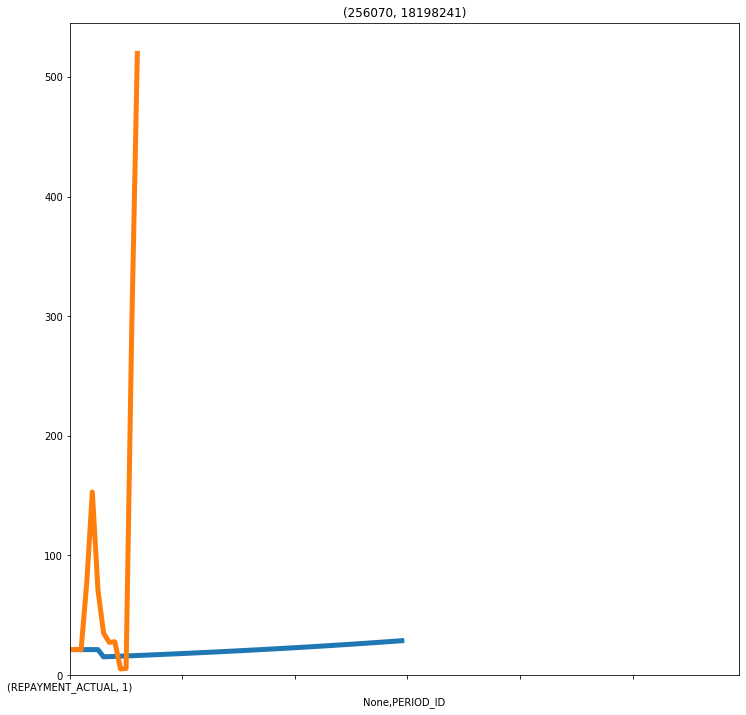

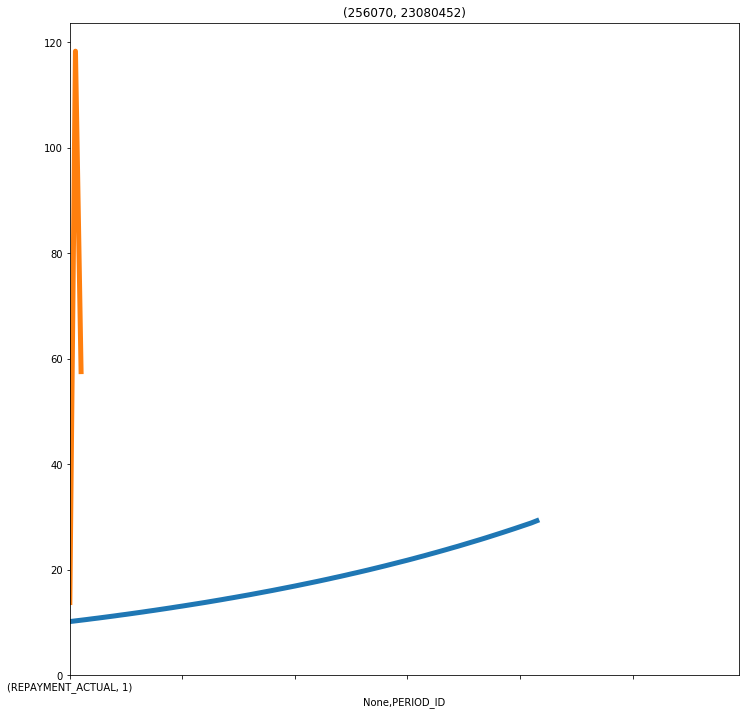

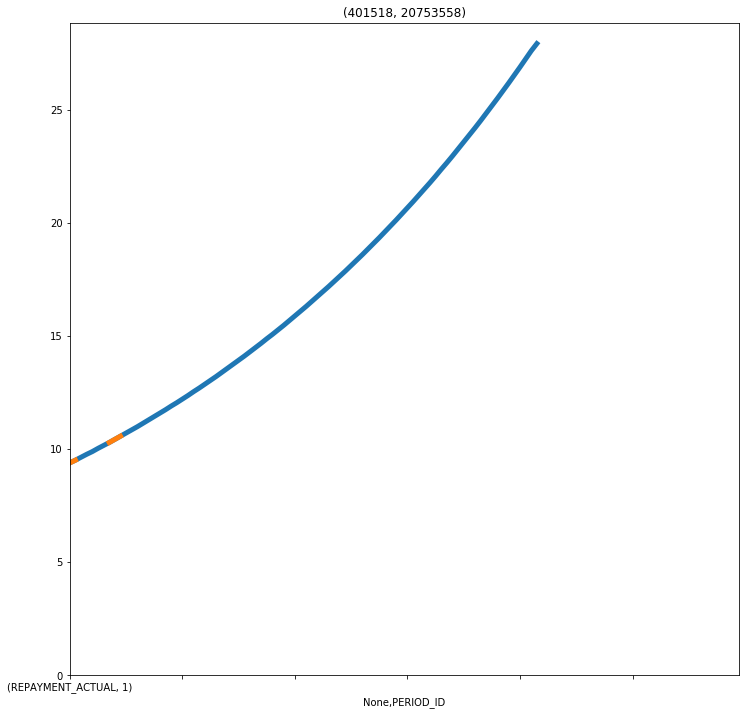

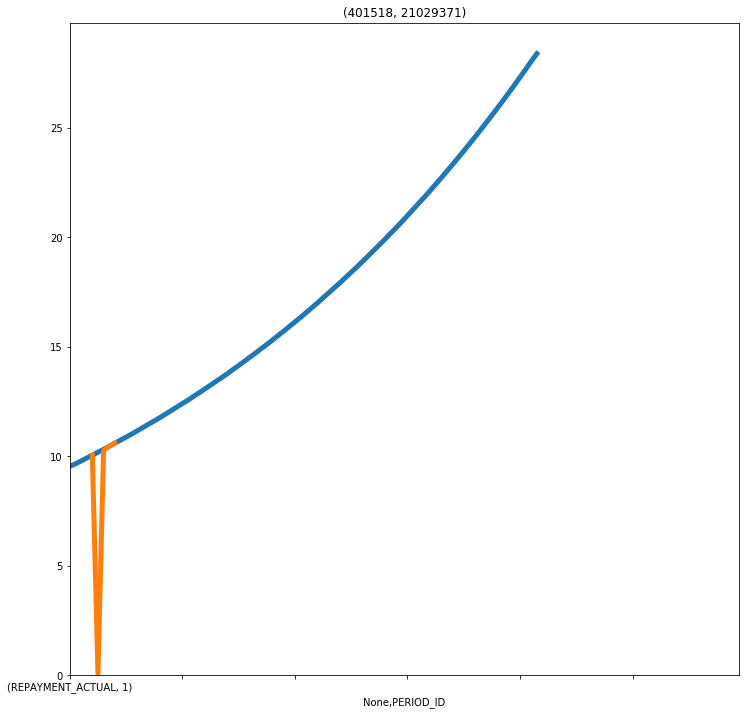

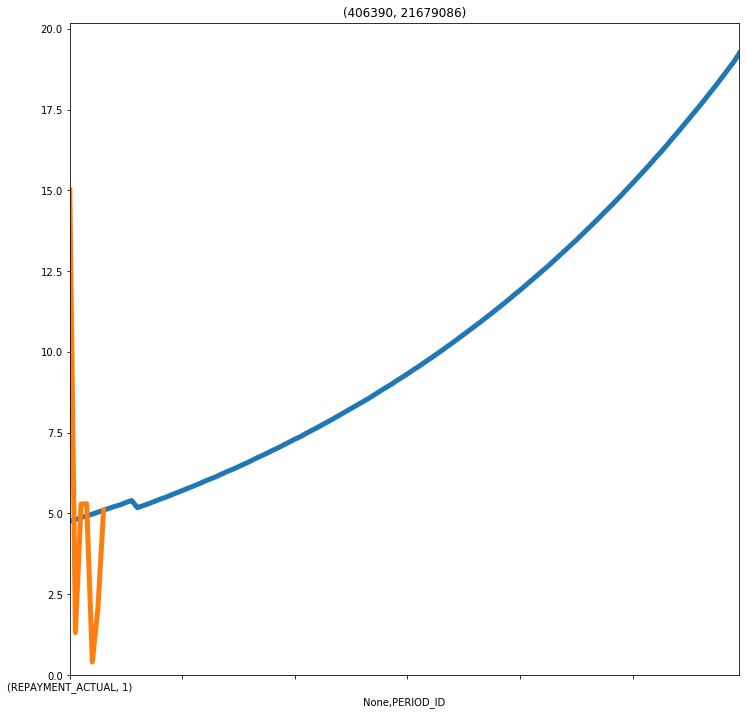

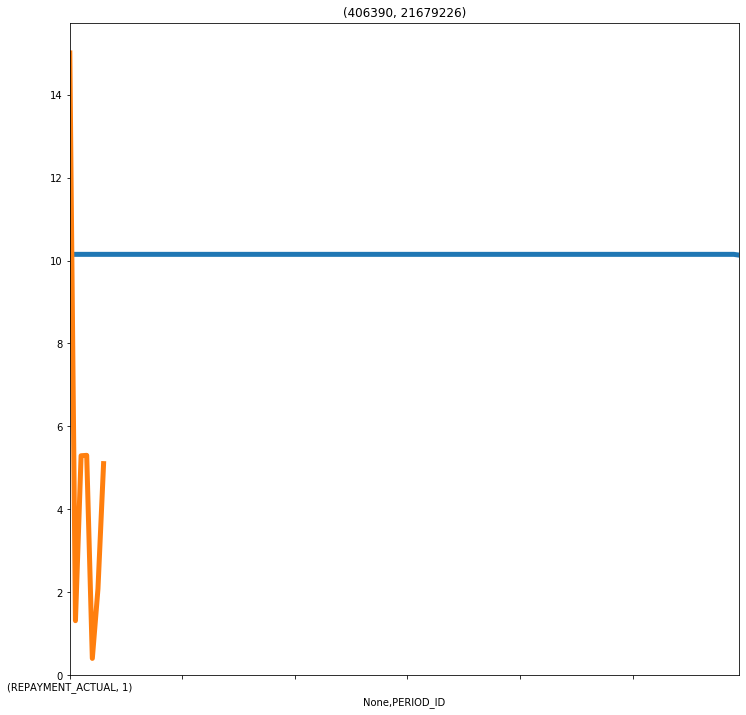

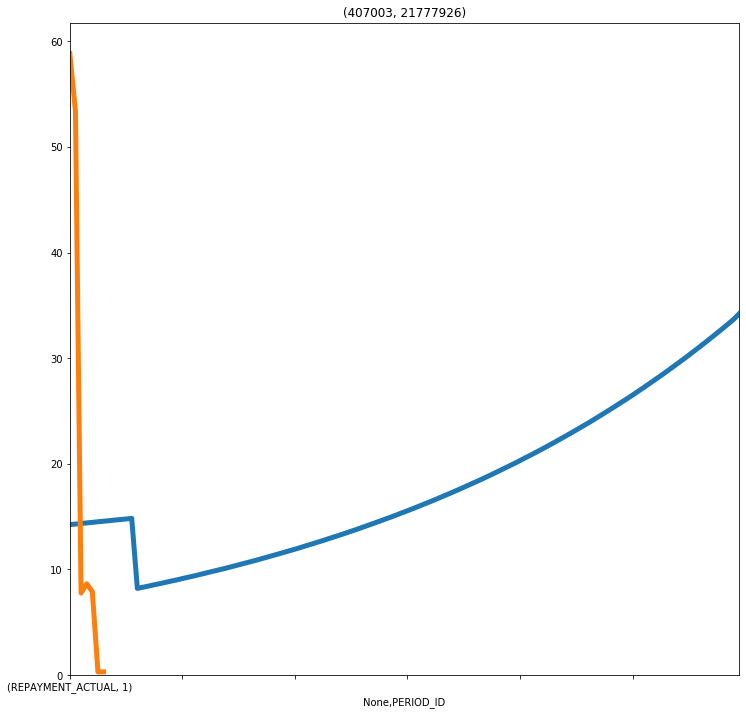

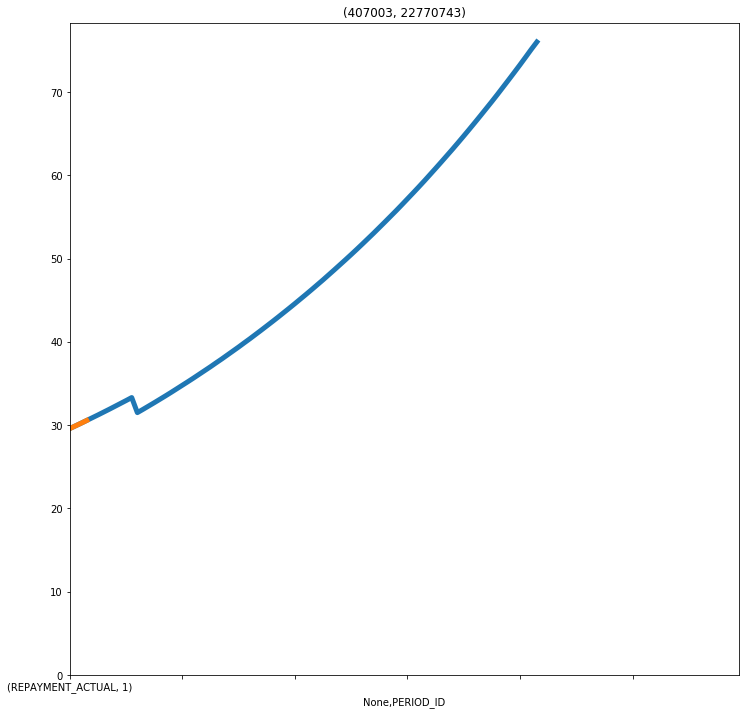

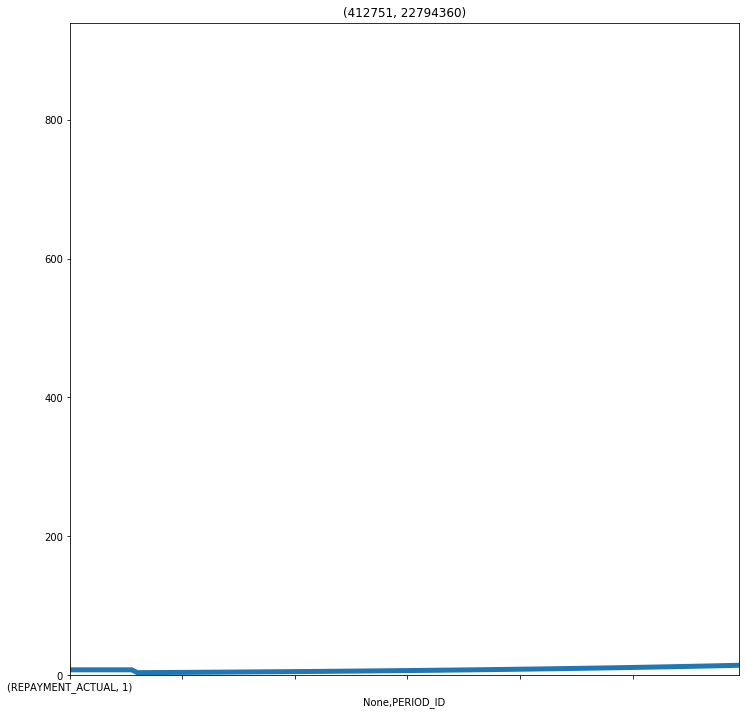

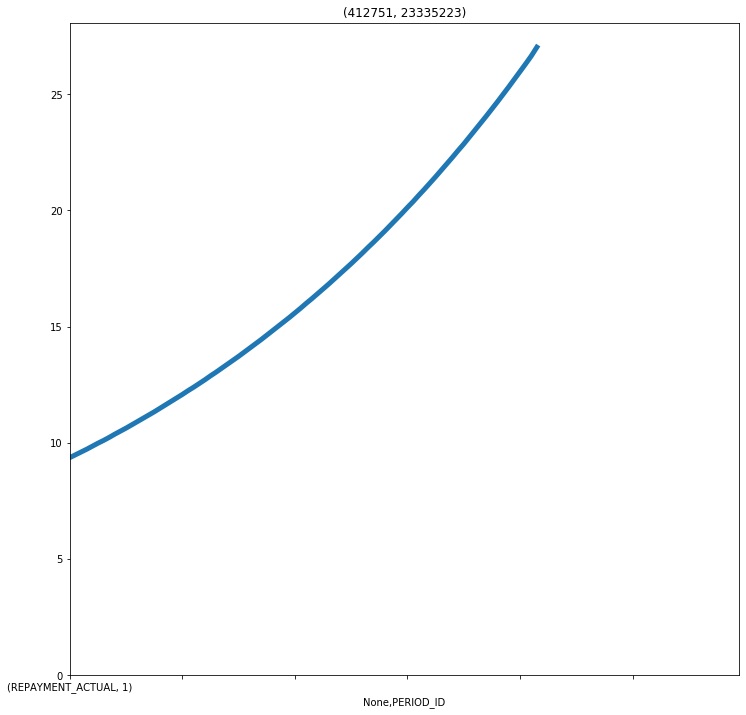

In [13]:
for i in range(pivot_scheduled_repeat.shape[0]):
    plt.figure()
    pivot_scheduled_repeat.iloc[i].T.plot(figsize=(12, 12), linewidth = 5)
    pivot_actual_repeat.iloc[i].T.plot(figsize=(12, 12), linewidth = 5)
    plt.ylim(ymin=0)
    
    plt.title(pivot_scheduled_repeat.iloc[i].name)    

# grace period

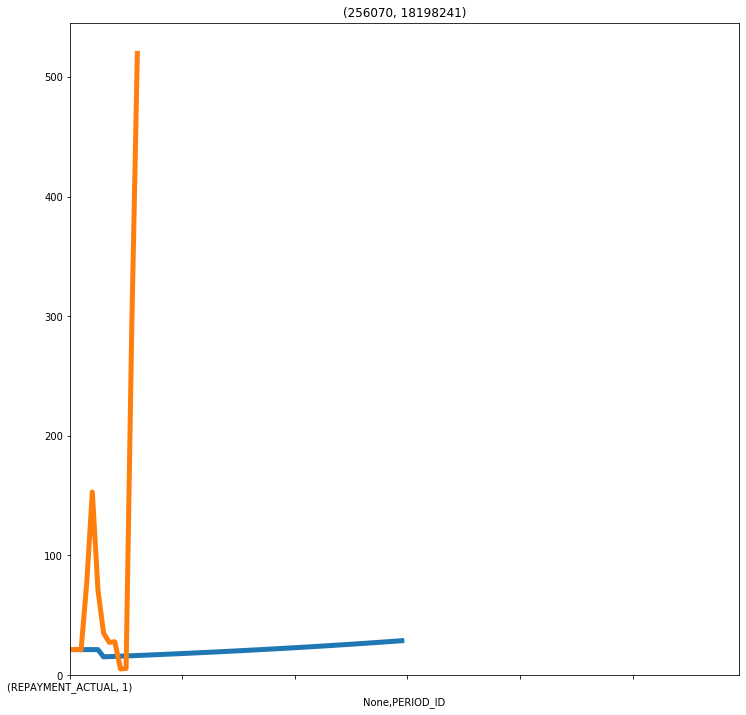

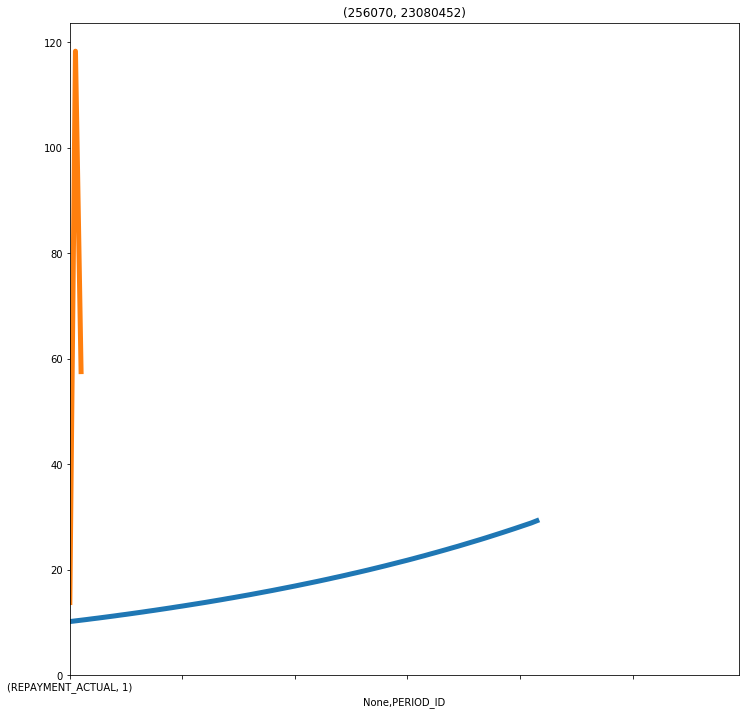

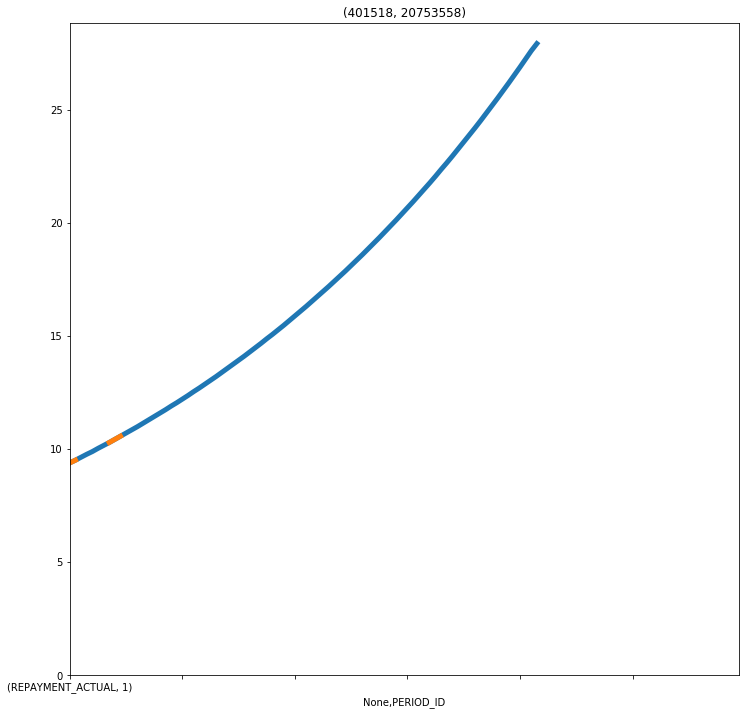

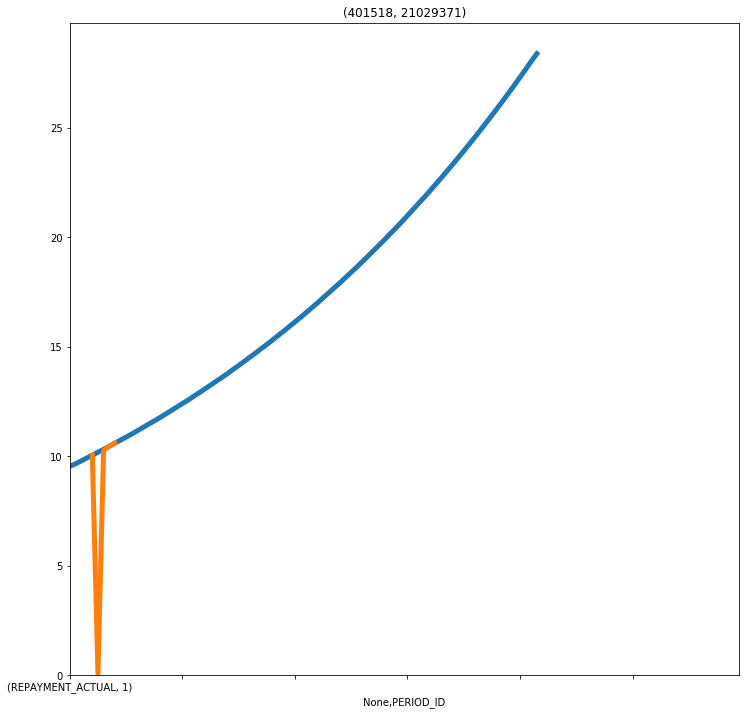

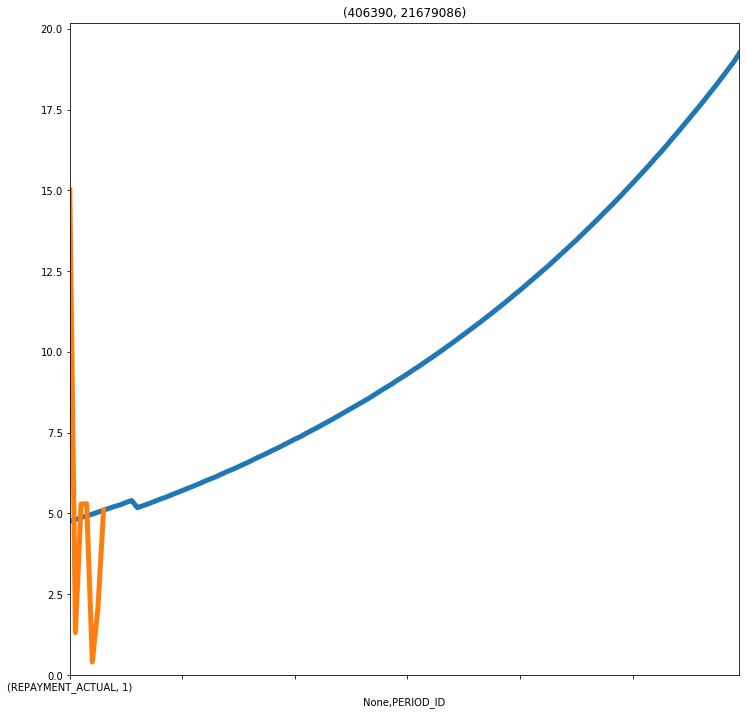

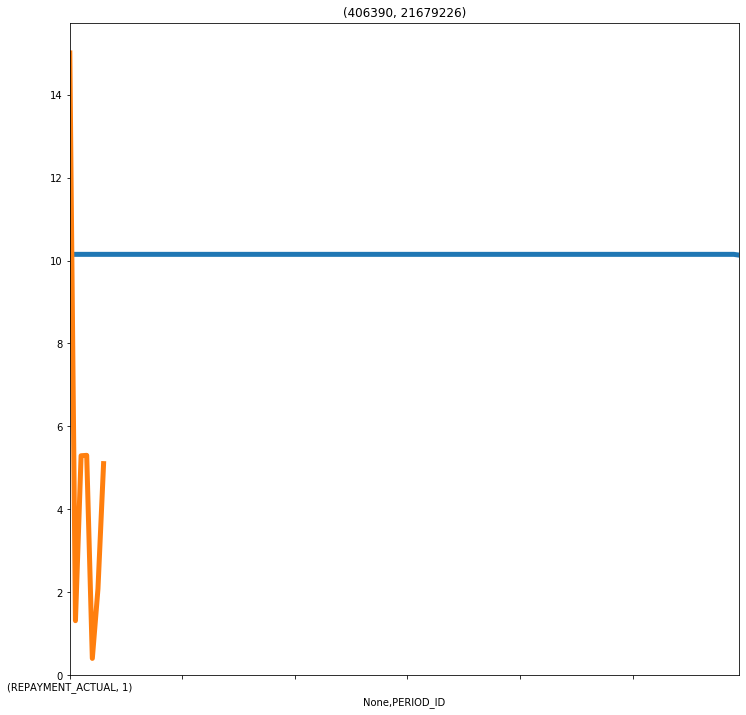

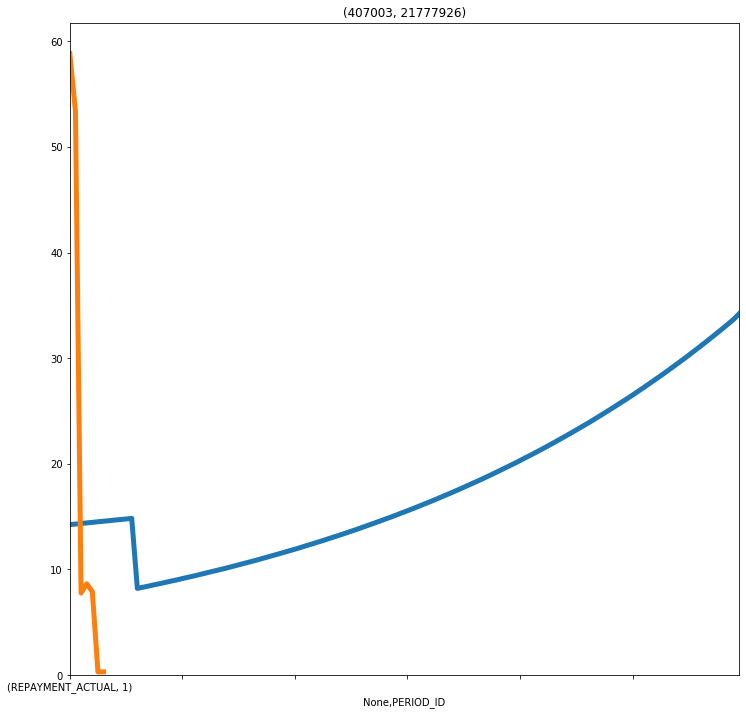

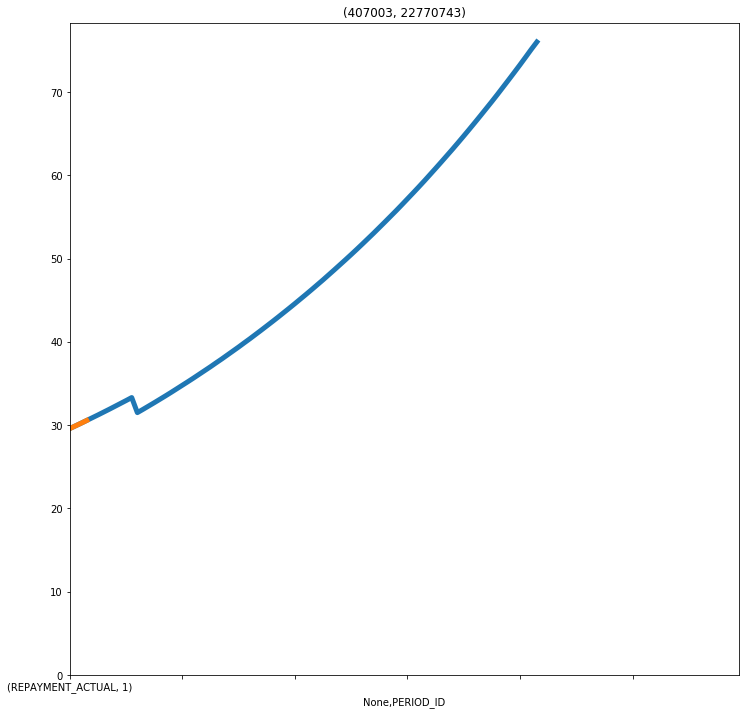

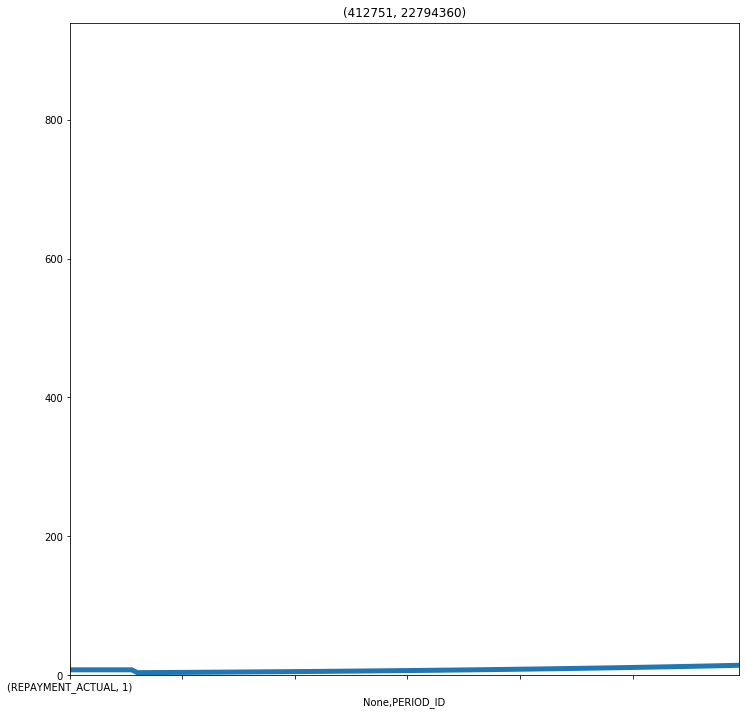

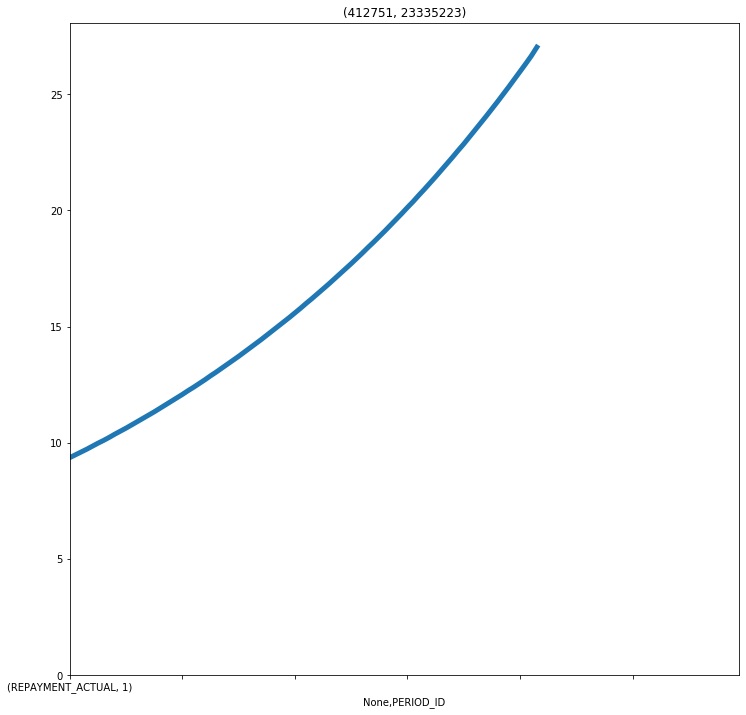

In [14]:
for i in range(pivot_scheduled_repeat.shape[0]):
    plt.figure()
    pivot_scheduled_repeat.iloc[i].T.plot(figsize=(12, 12), linewidth = 5)
    pivot_actual_repeat.iloc[i].T.plot(figsize=(12, 12), linewidth = 5)
    plt.ylim(ymin=0)
    
    plt.title(pivot_scheduled_repeat.iloc[i].name)

In [15]:
pivot_actual.iloc[i].name

17343042

In [16]:
print('grace: ', static[static['CONTRACT_ID'] == pivot_actual.iloc[i].name]['GRACE_PERIOD'].values[0],
'rate_change:', static[static['CONTRACT_ID'] == pivot_actual.iloc[i].name]['RATE_CHANGE_AFTER_GRACE'].values[0])


grace:  6 rate_change: 13


In [17]:
def print_contract(contract_id):
    pivot_scheduled
    plt.figure()
    pivot_scheduled.loc[contract_id].T.plot(figsize=(12, 12), linewidth = 5)
    pivot_actual.loc[contract_id].T.plot(figsize=(12, 12), linewidth = 5)
    plt.ylim(ymin=0)
    title = 'grace: ' + str(static[static['CONTRACT_ID'] == pivot_actual.loc[contract_id].name]['GRACE_PERIOD'].values[0]) + \
    '   rate_change:' + str(static[static['CONTRACT_ID'] == pivot_actual.loc[contract_id].name]['RATE_CHANGE_AFTER_GRACE'].values[0])

    plt.title(title)

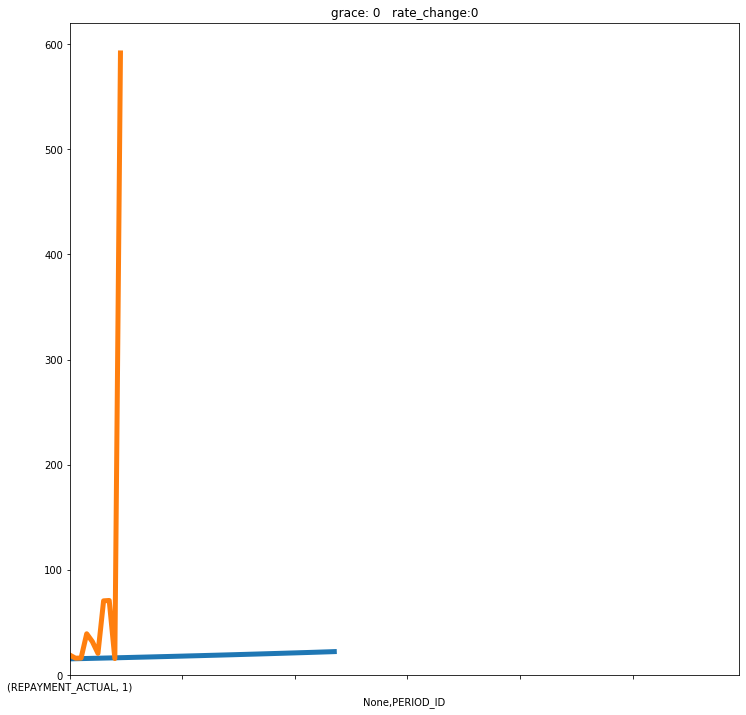

In [18]:
print_contract(17496736)

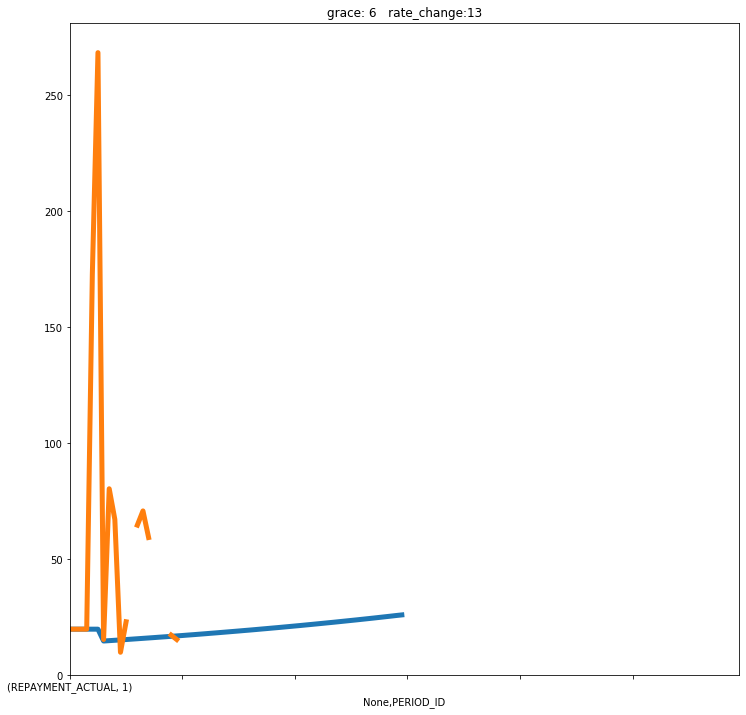

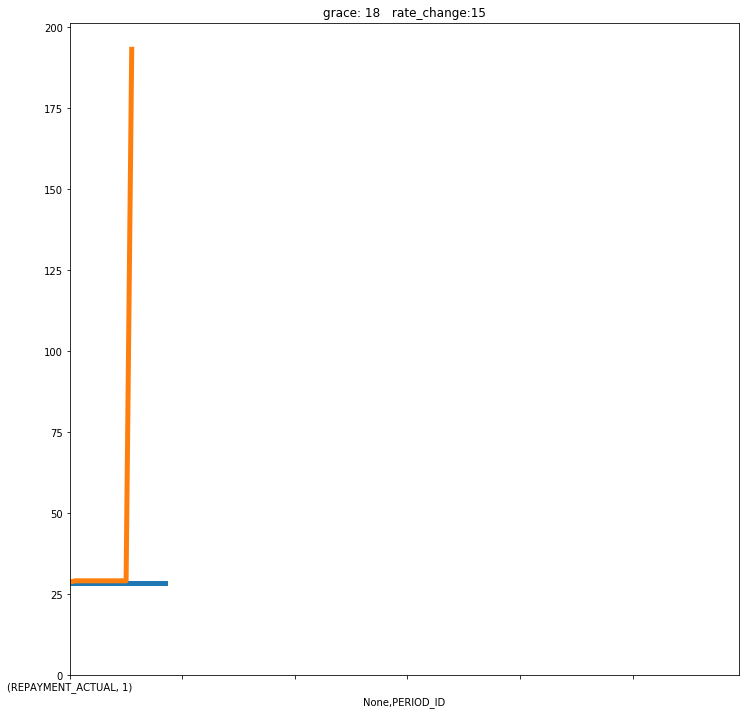

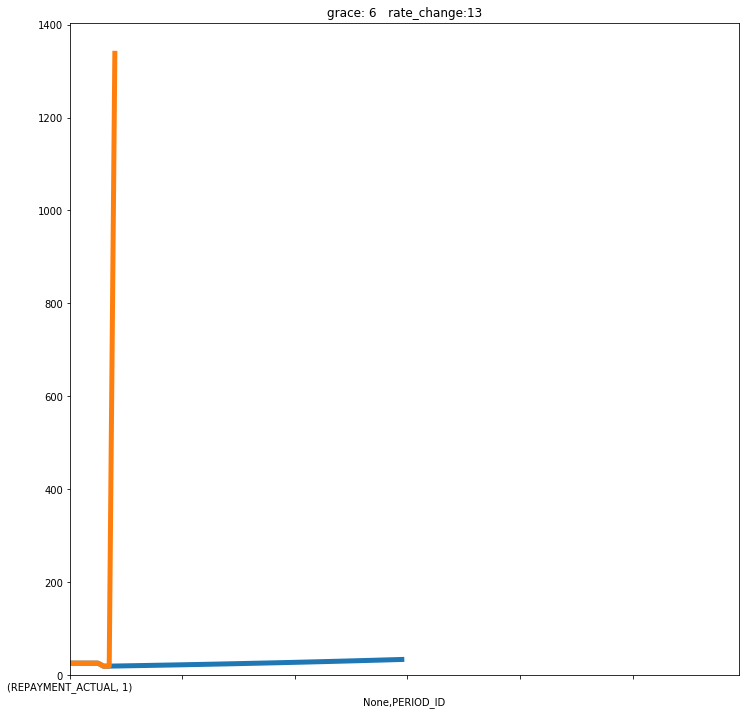

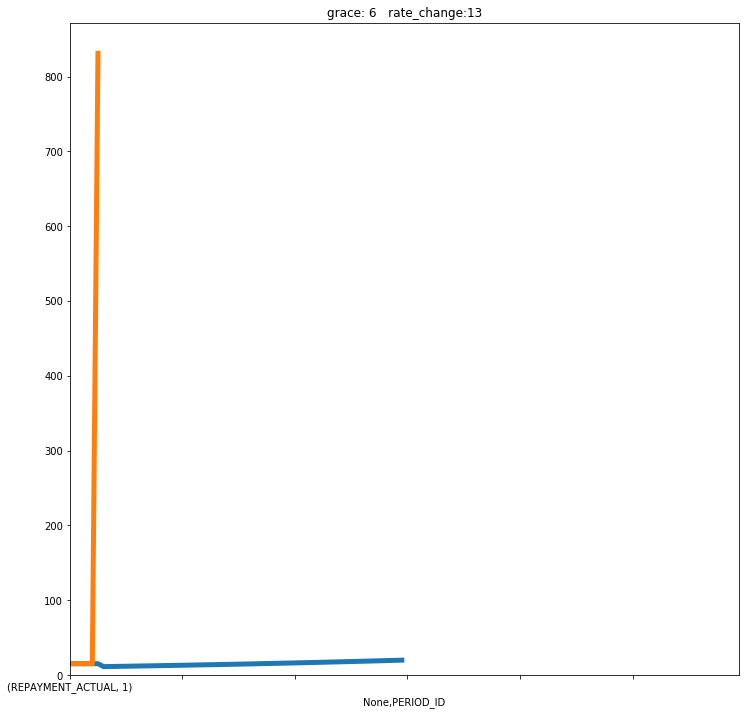

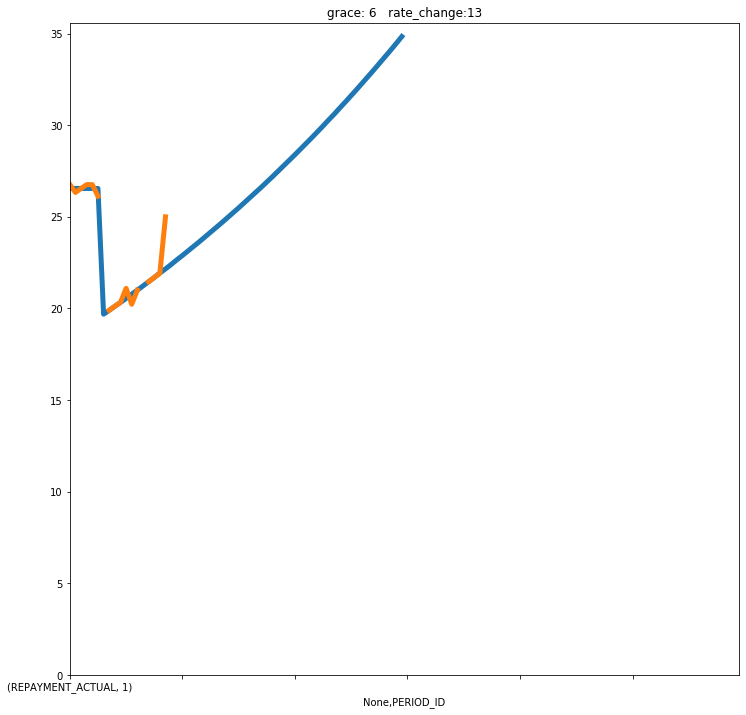

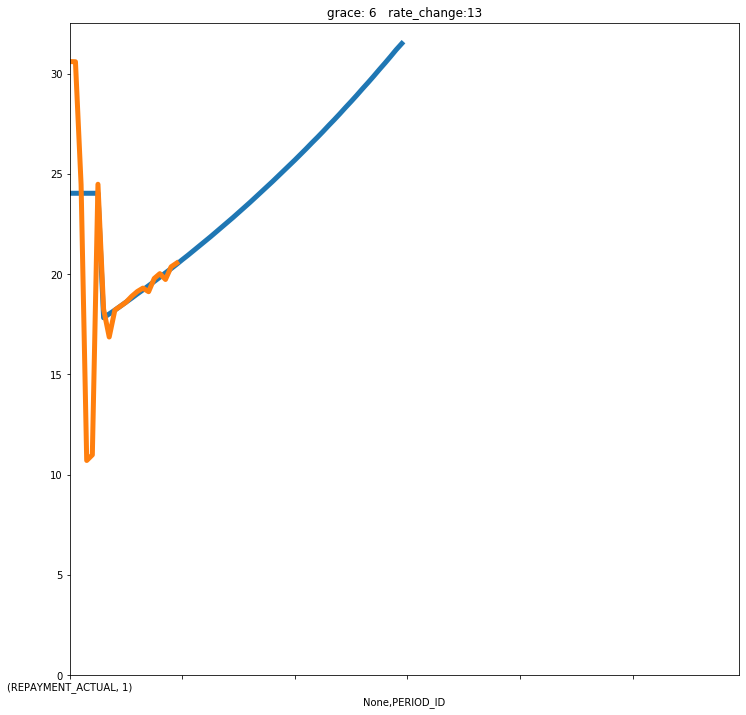

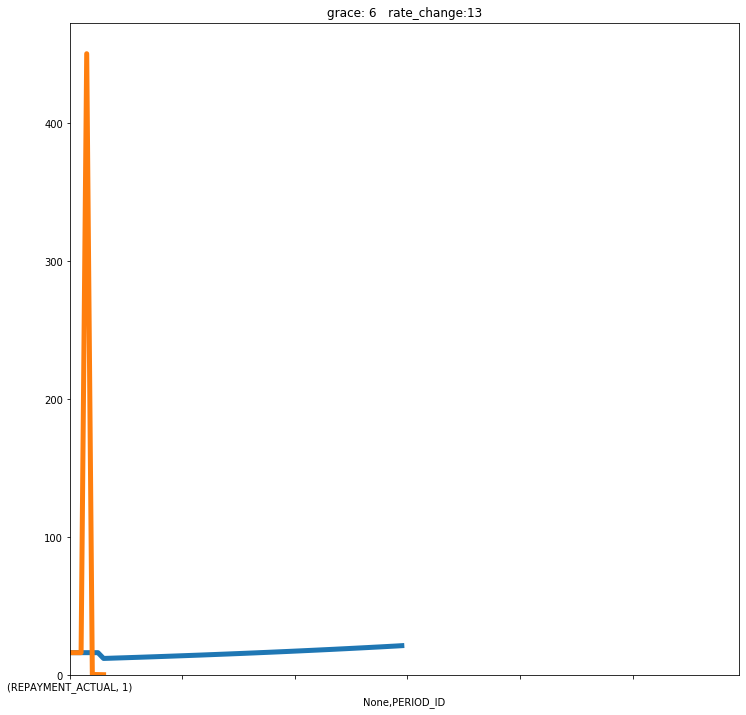

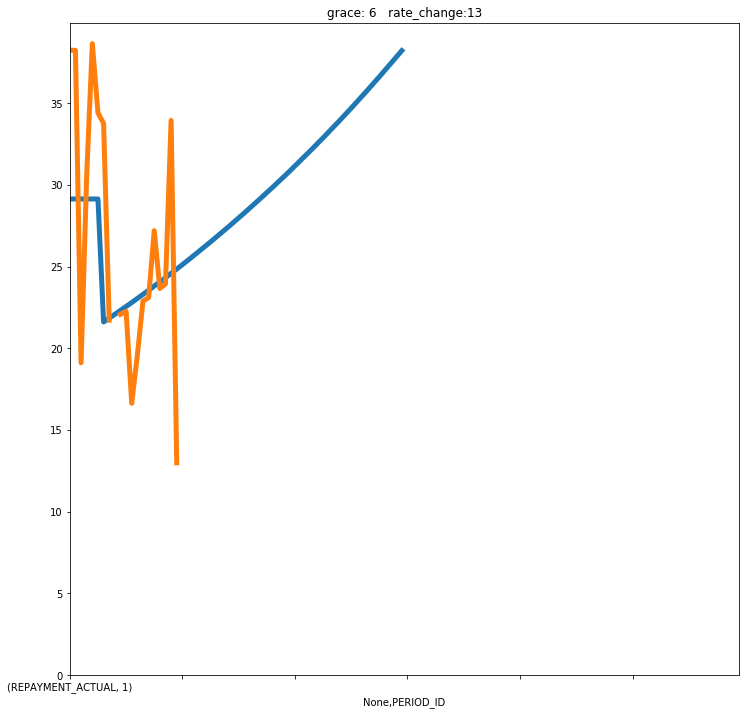

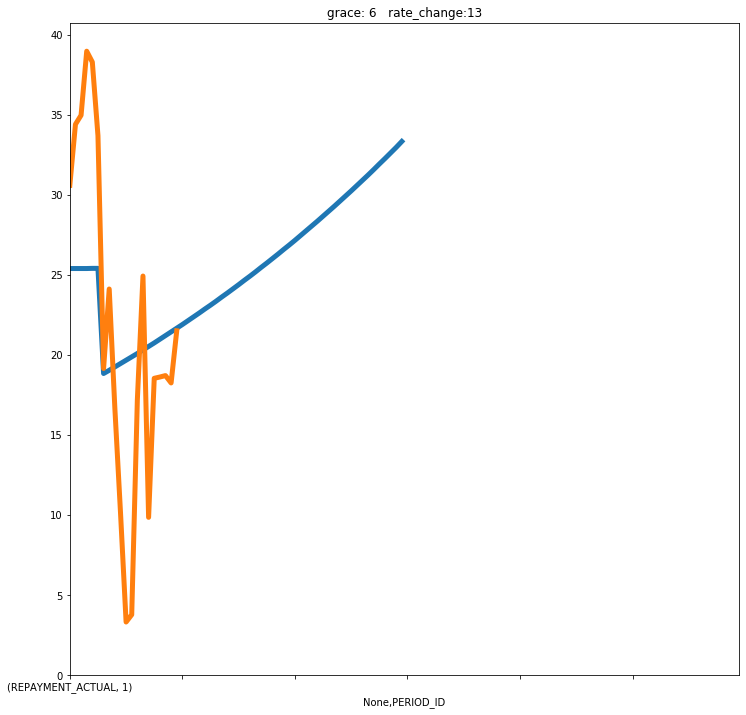

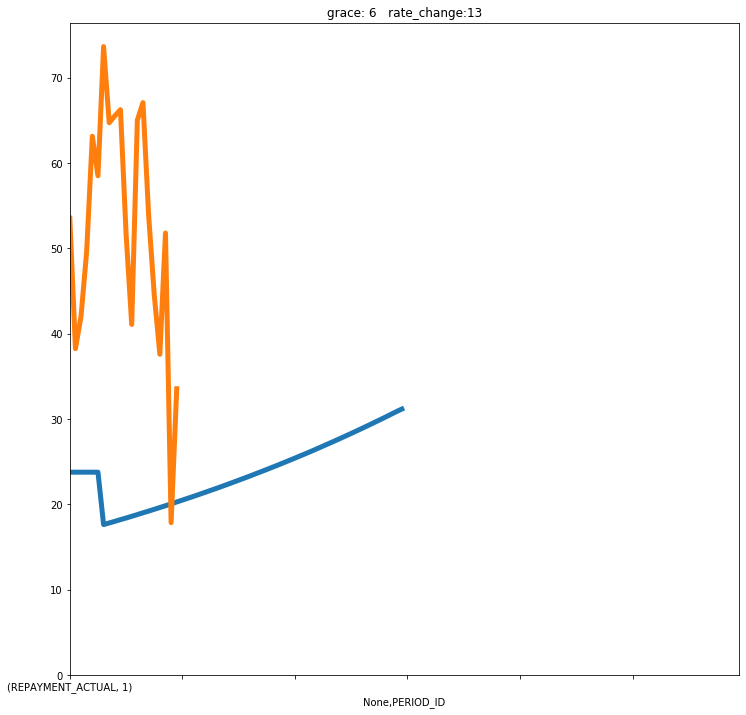

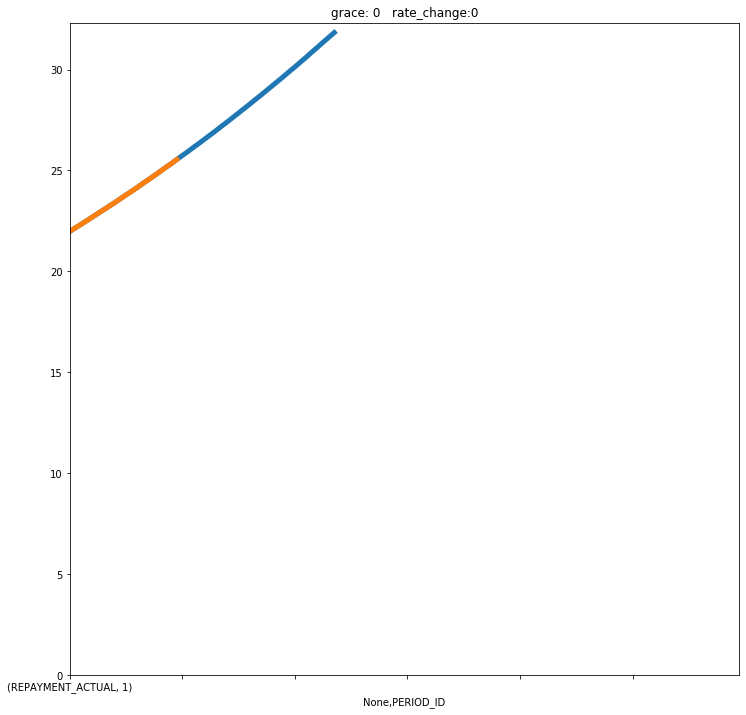

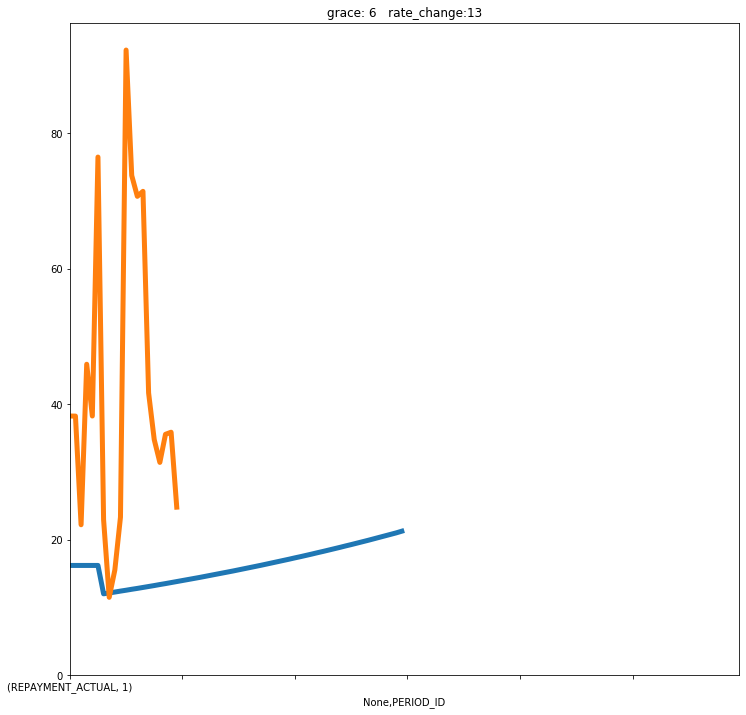

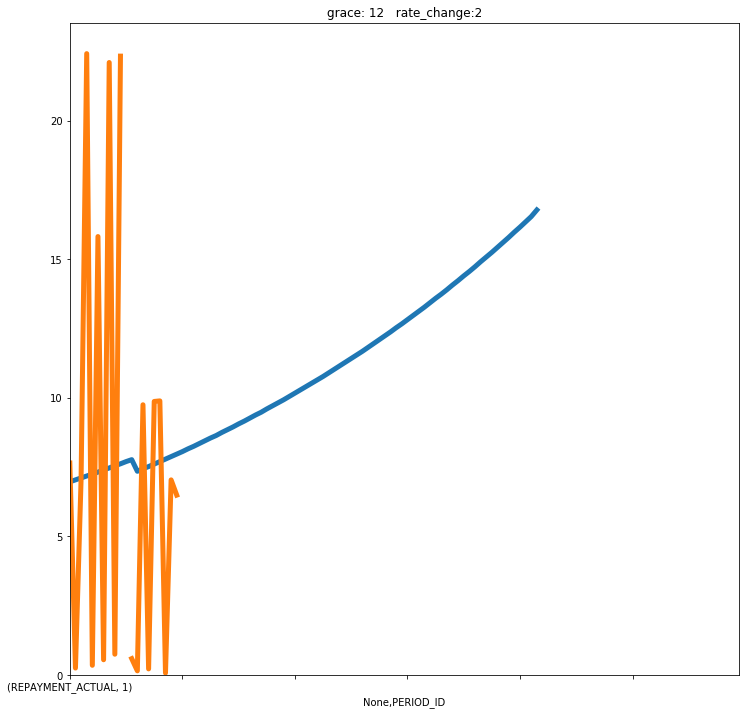

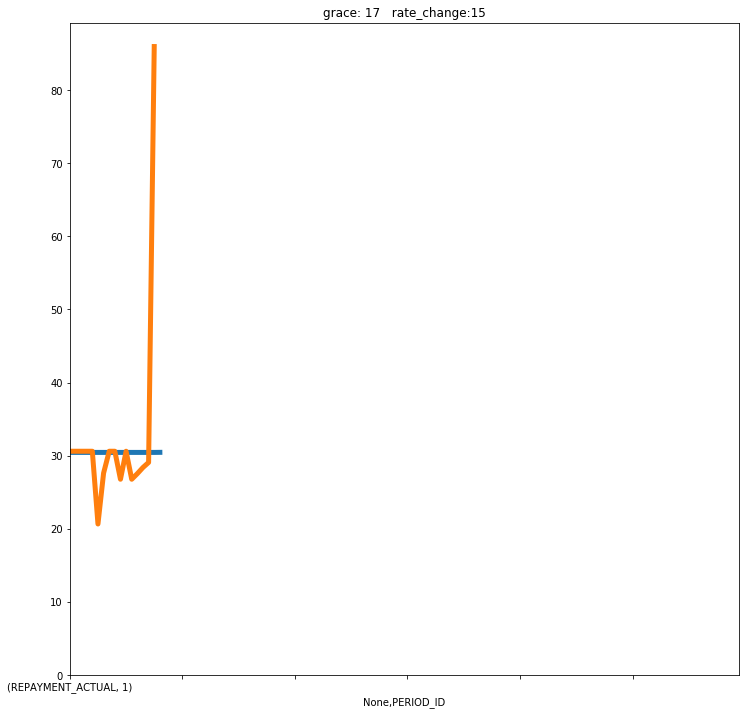

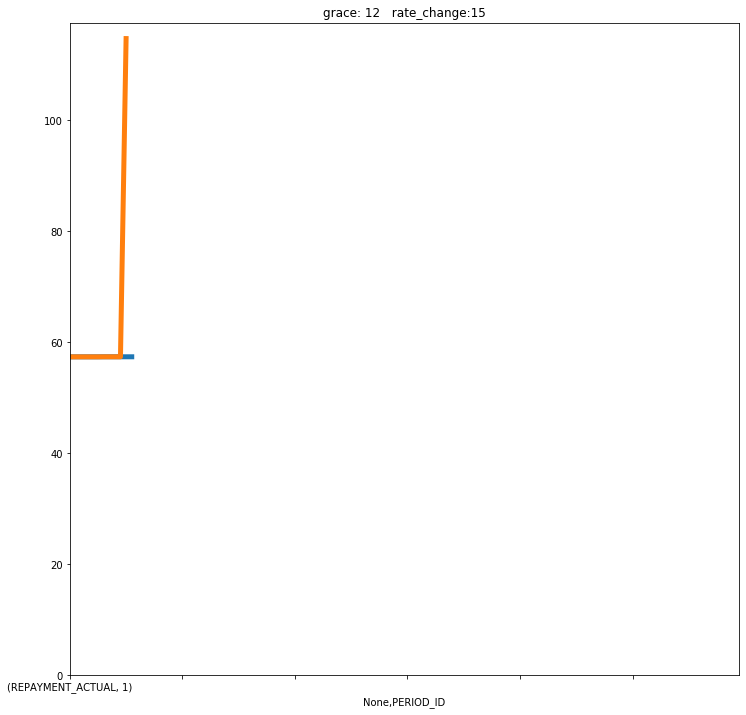

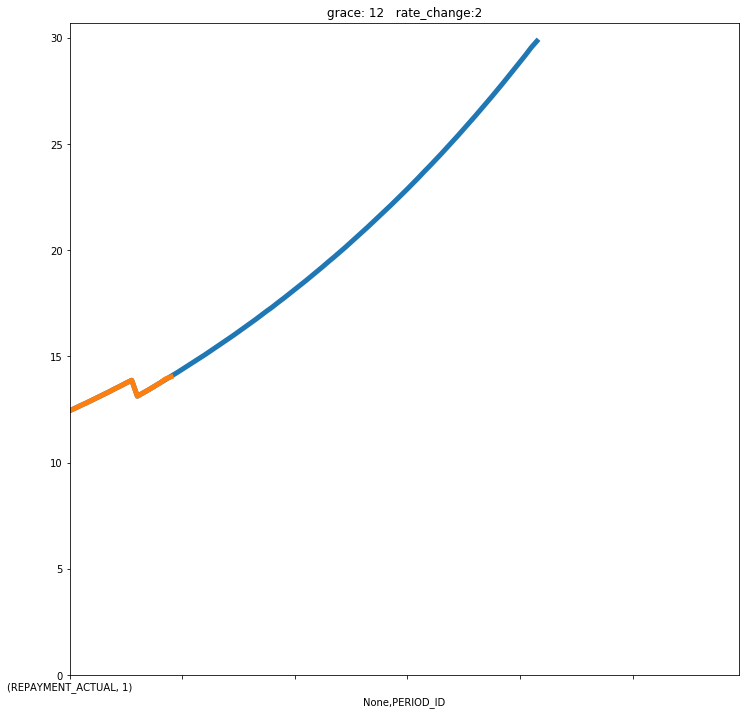

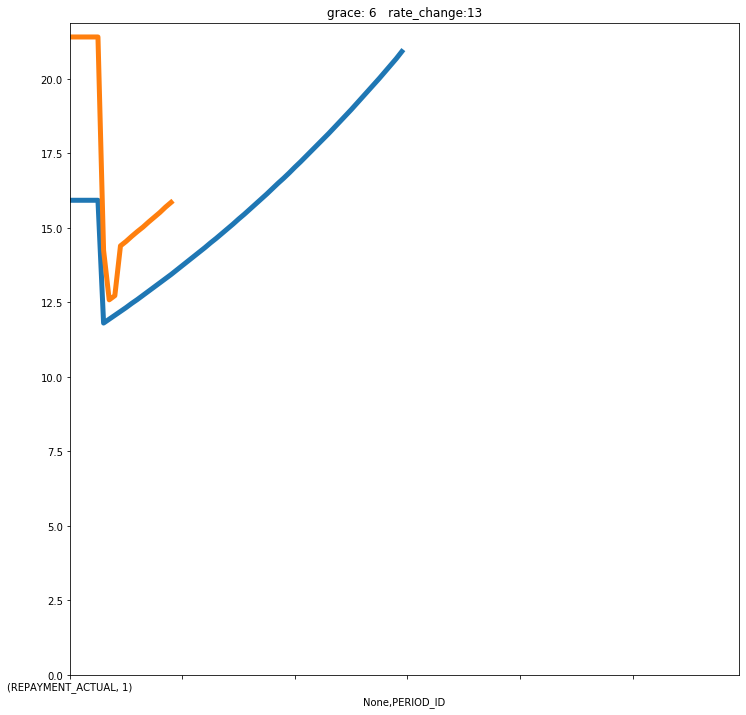

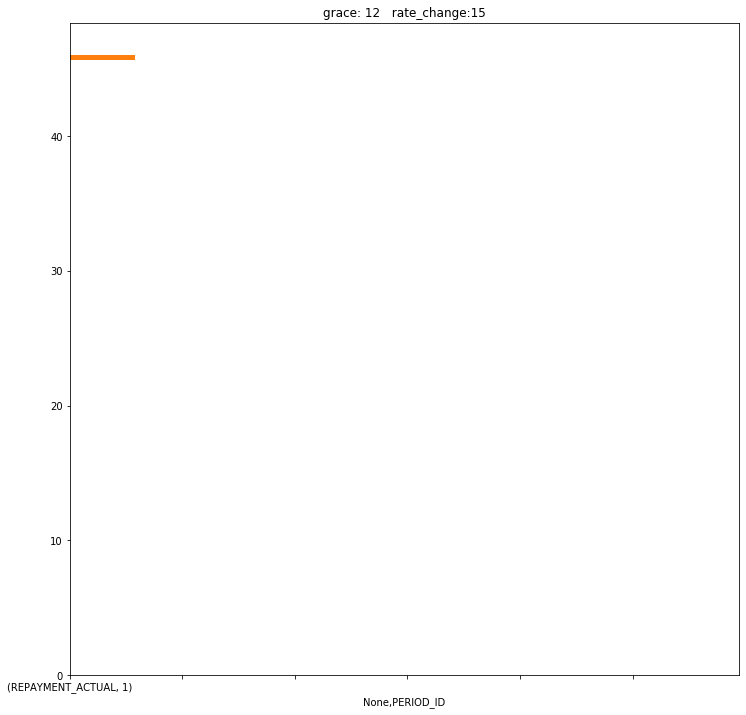

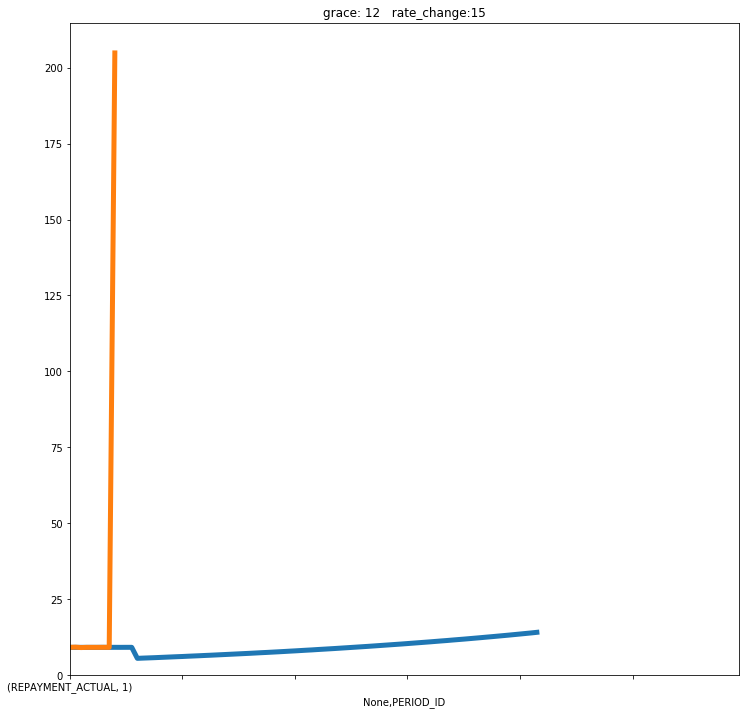

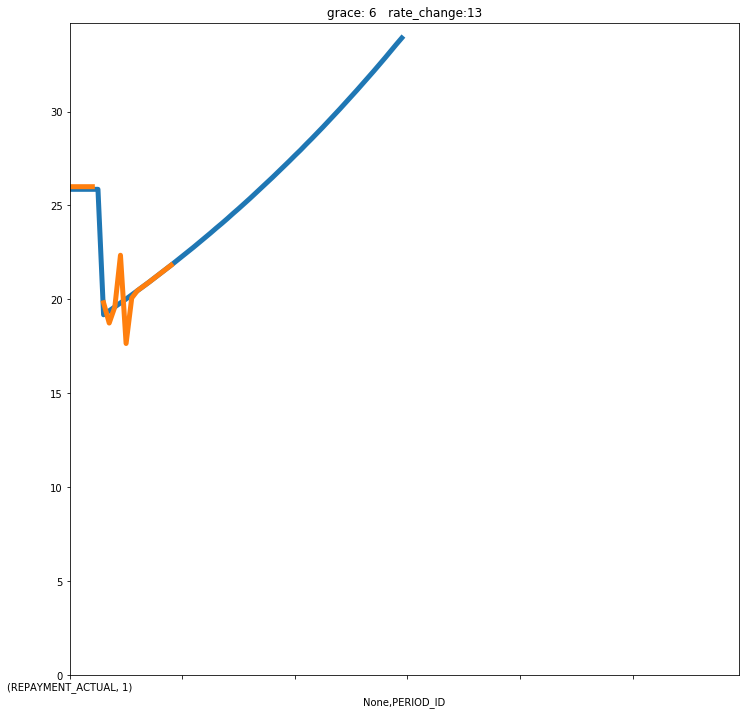

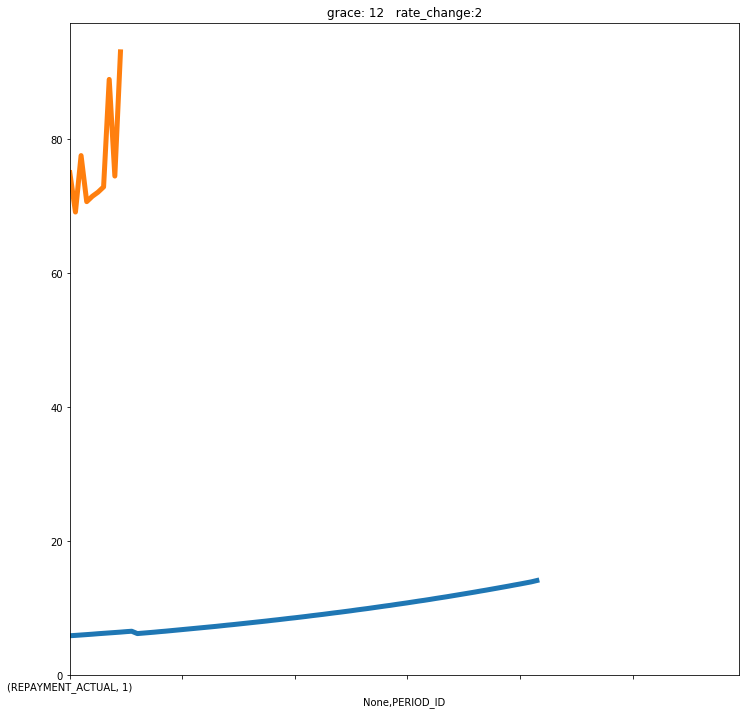

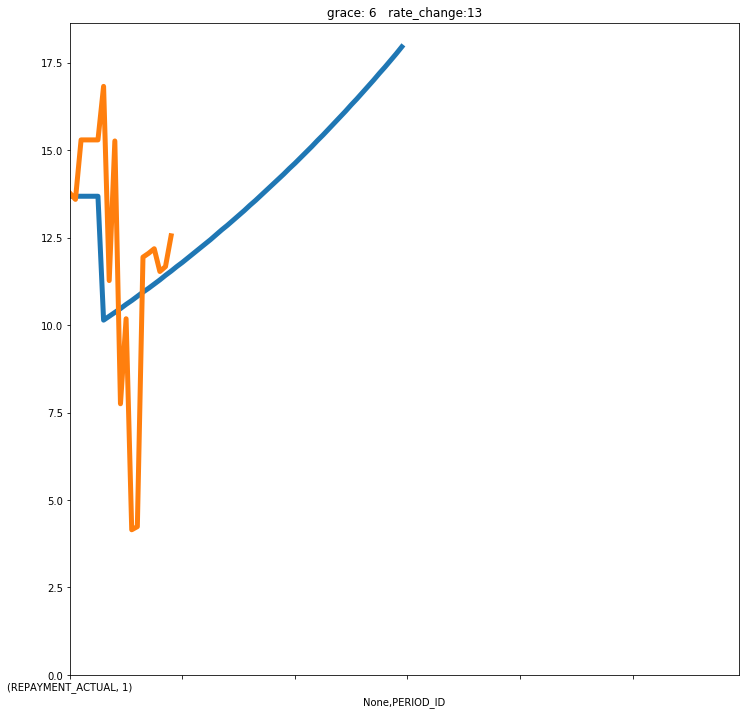

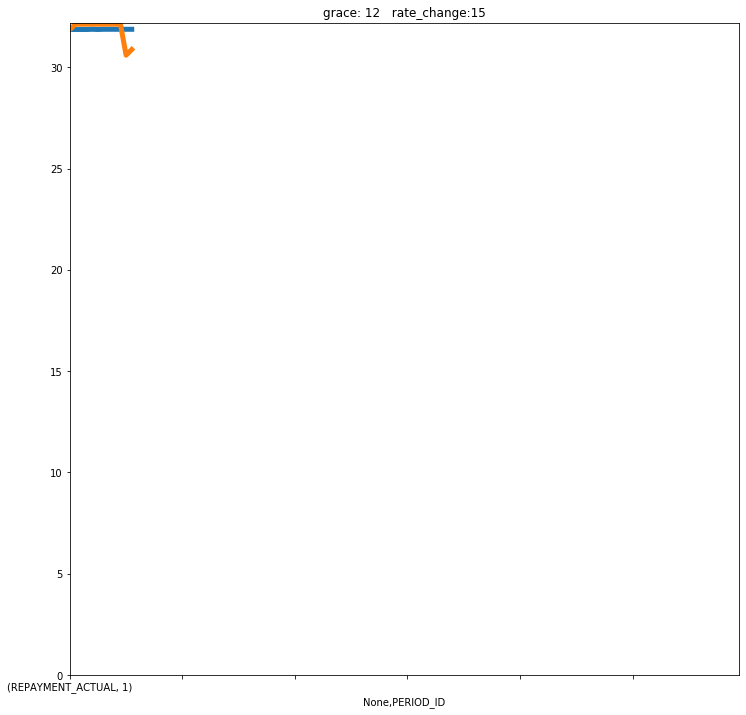

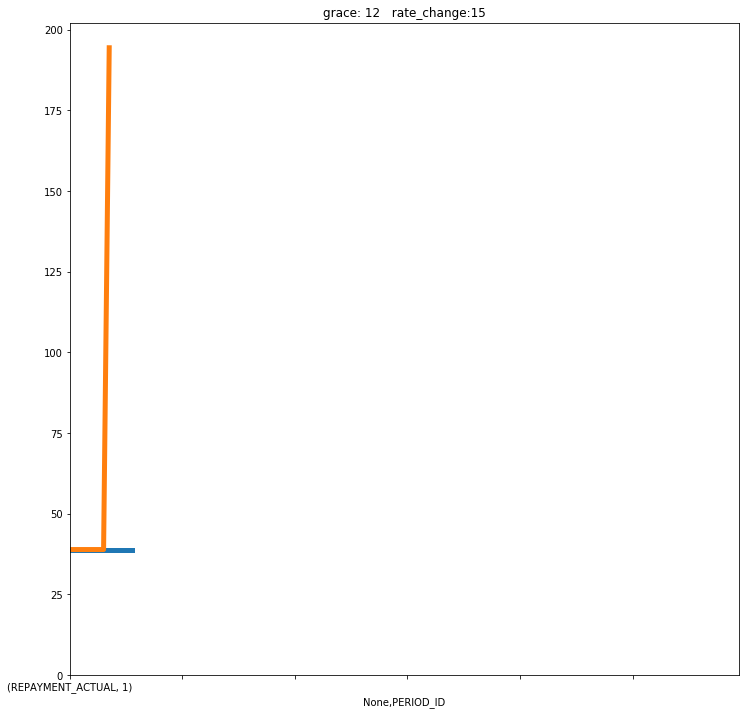

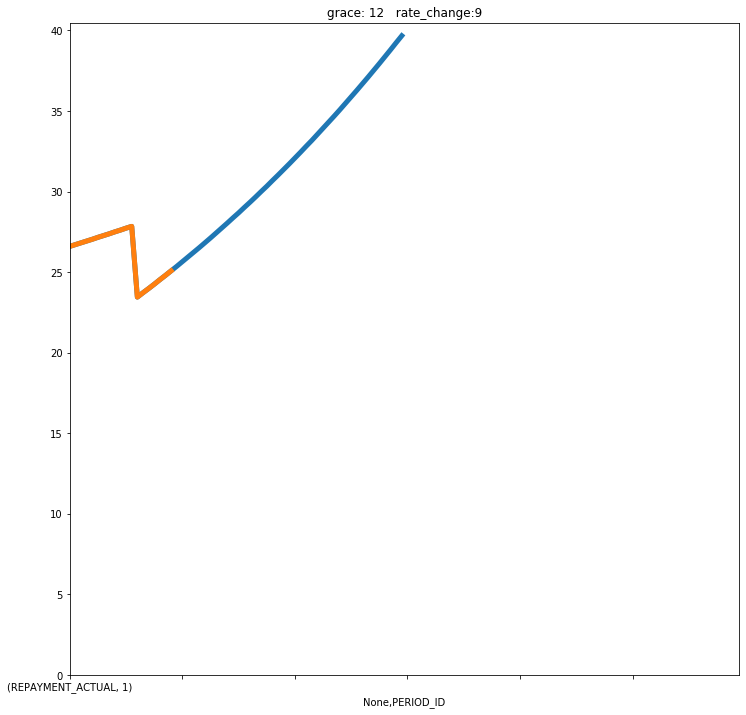

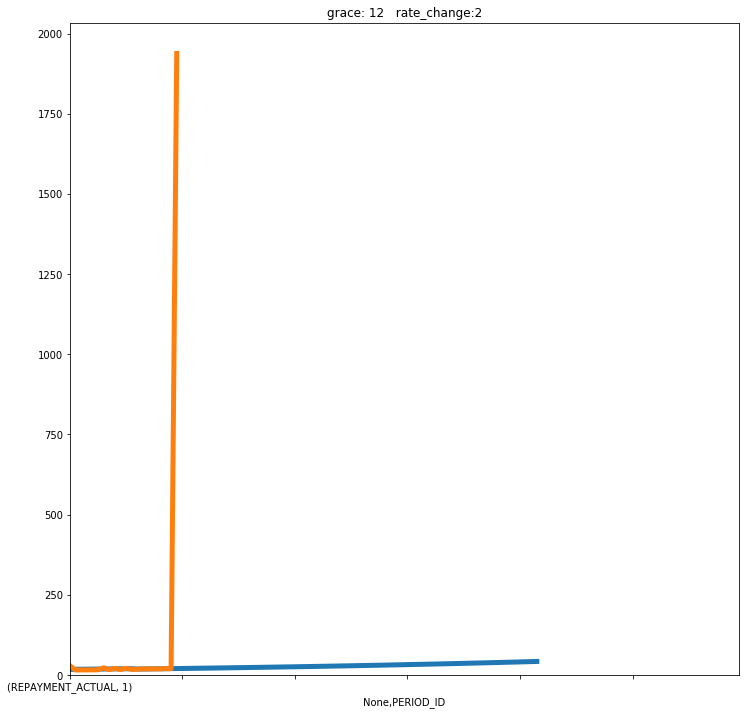

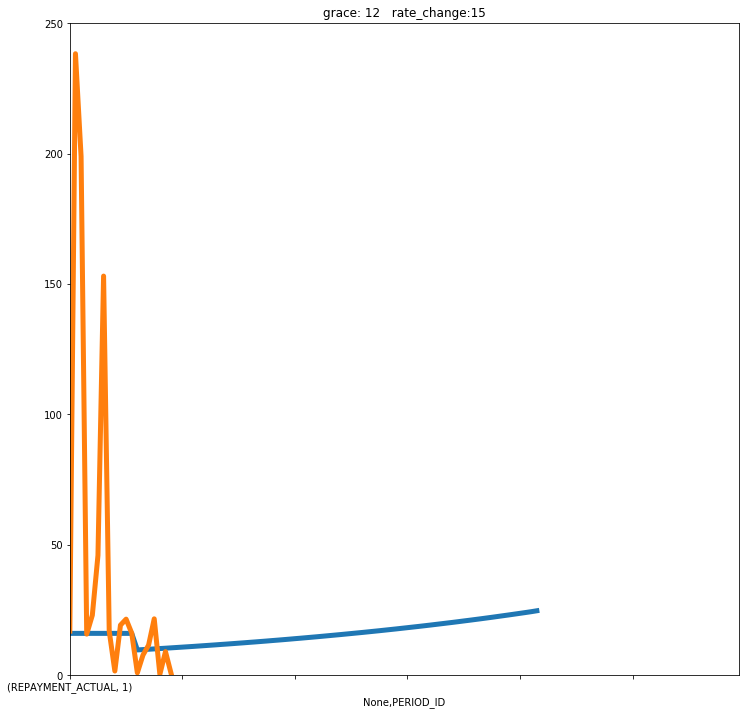

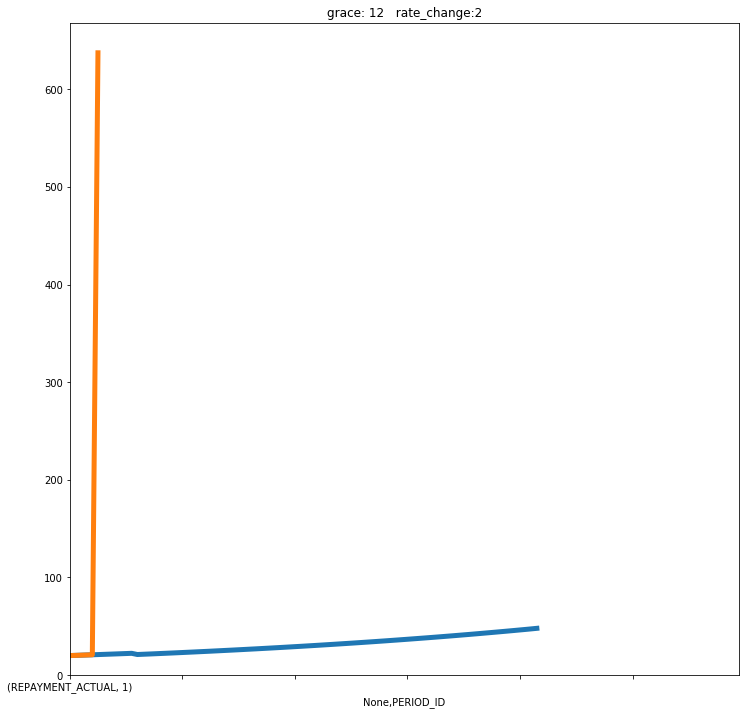

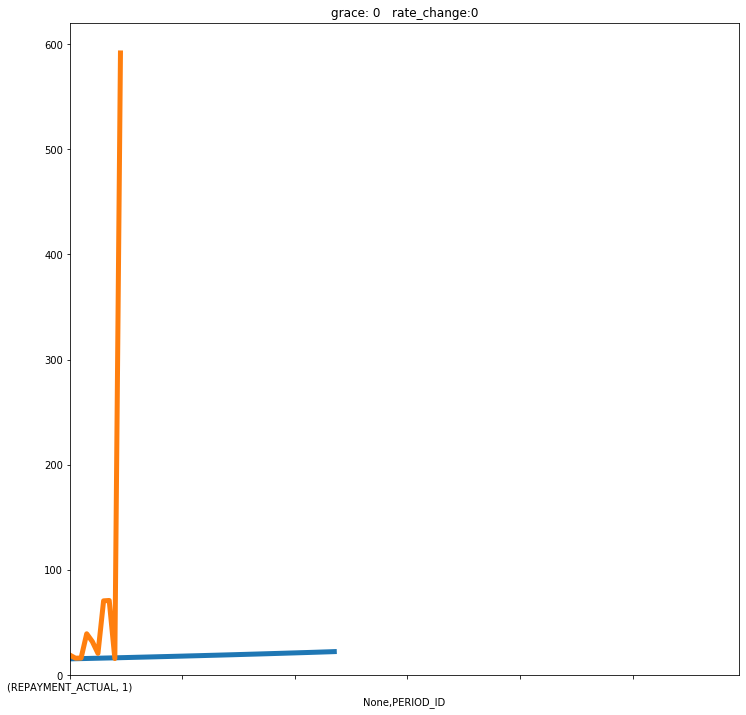

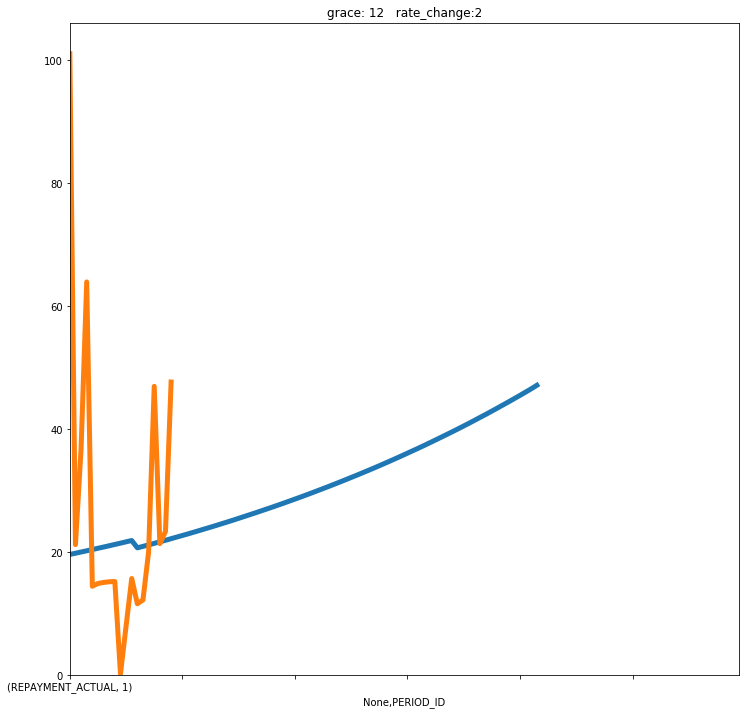

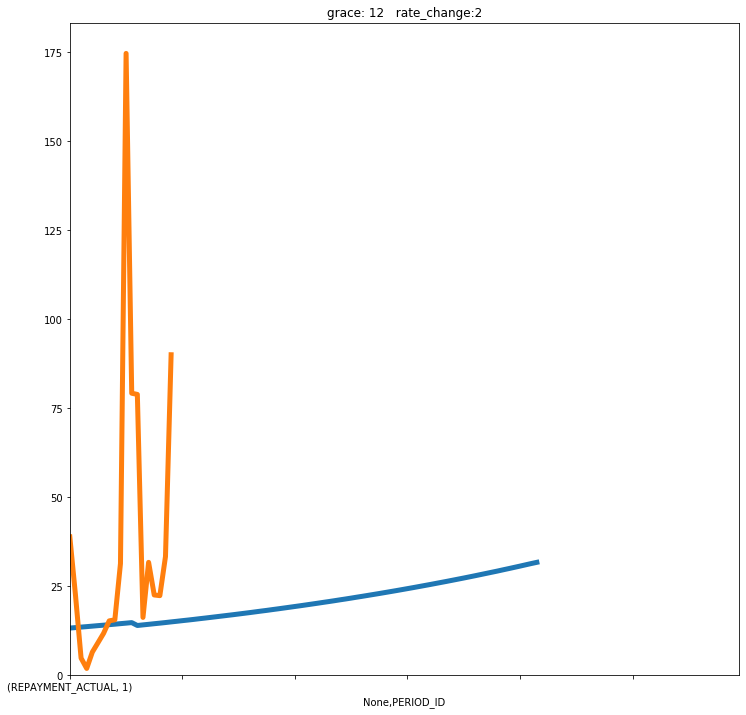

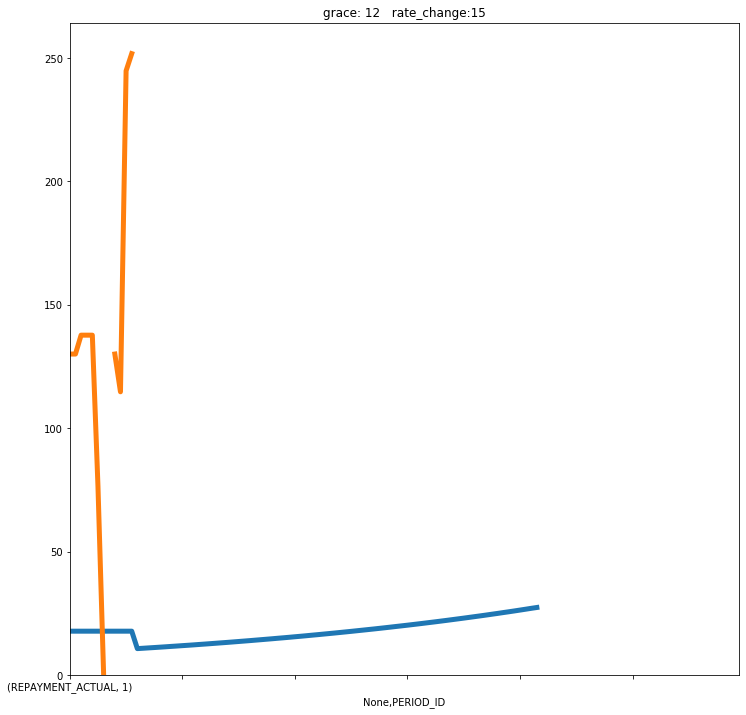

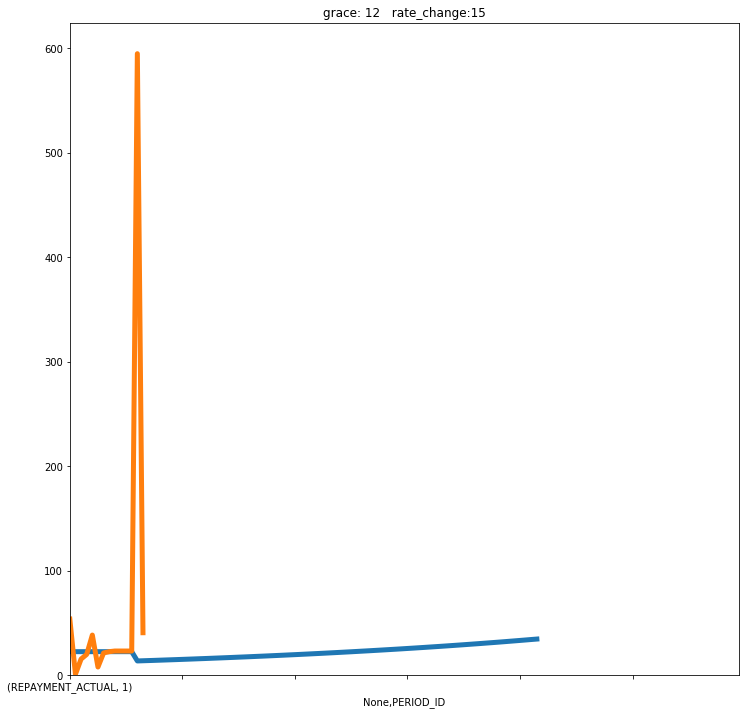

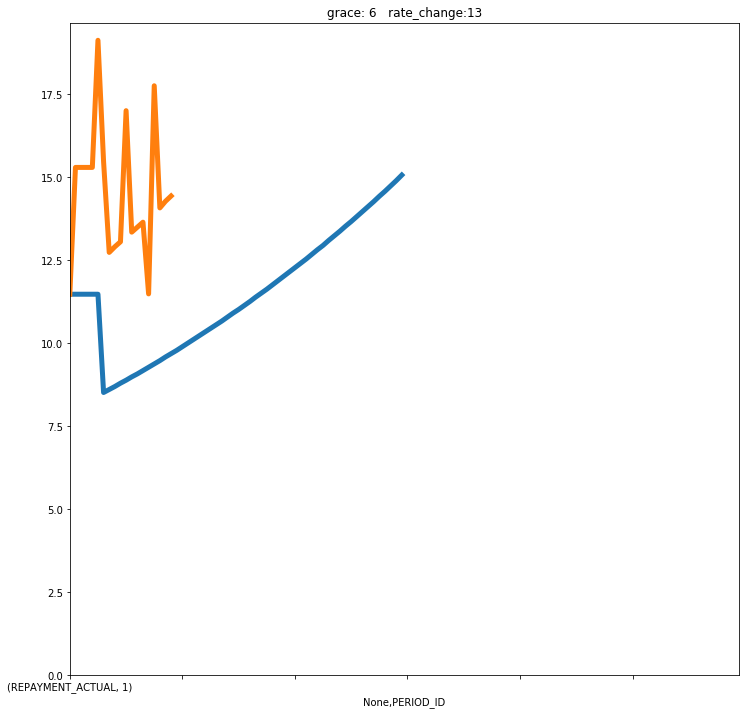

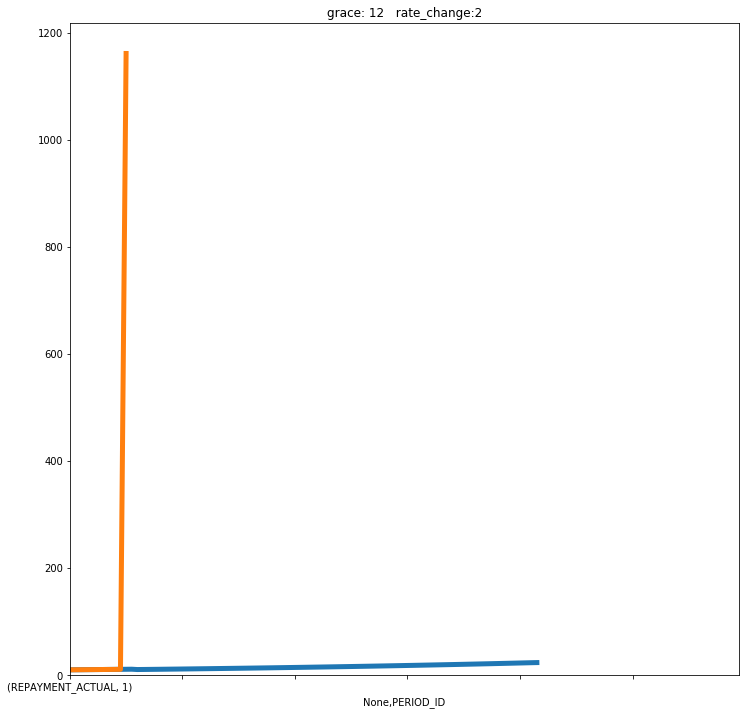

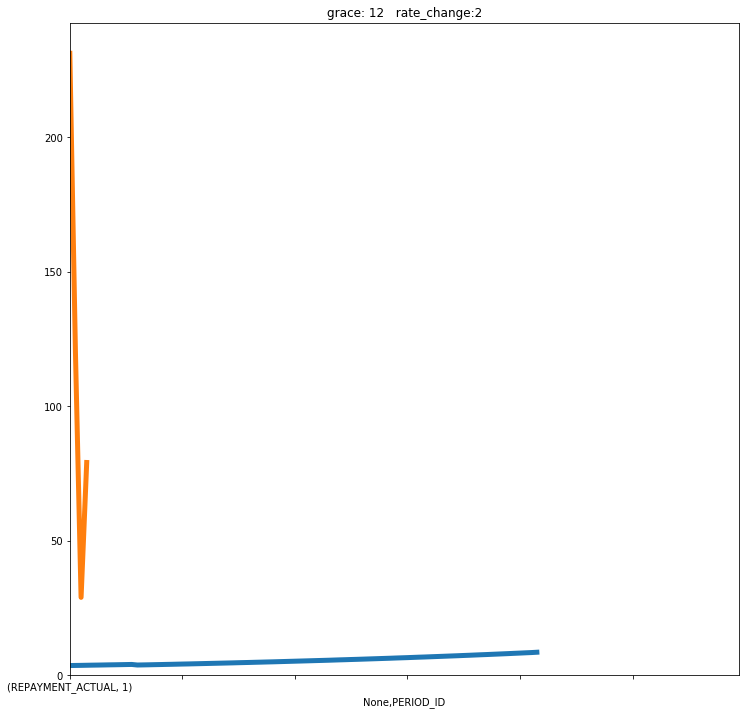

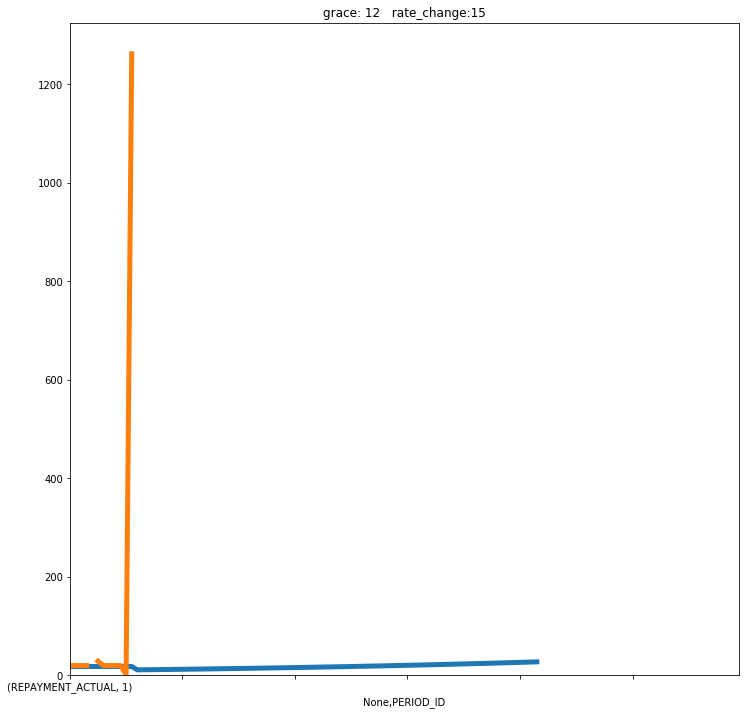

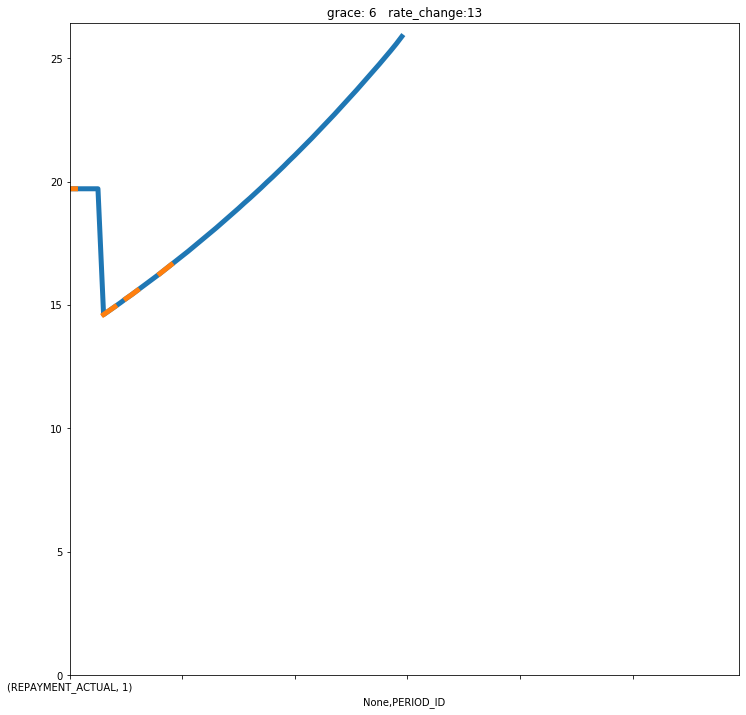

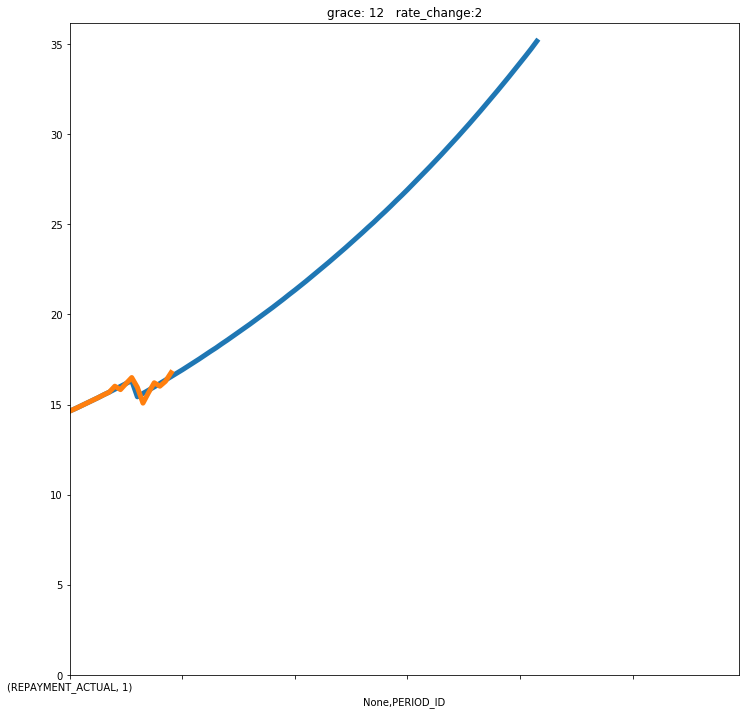

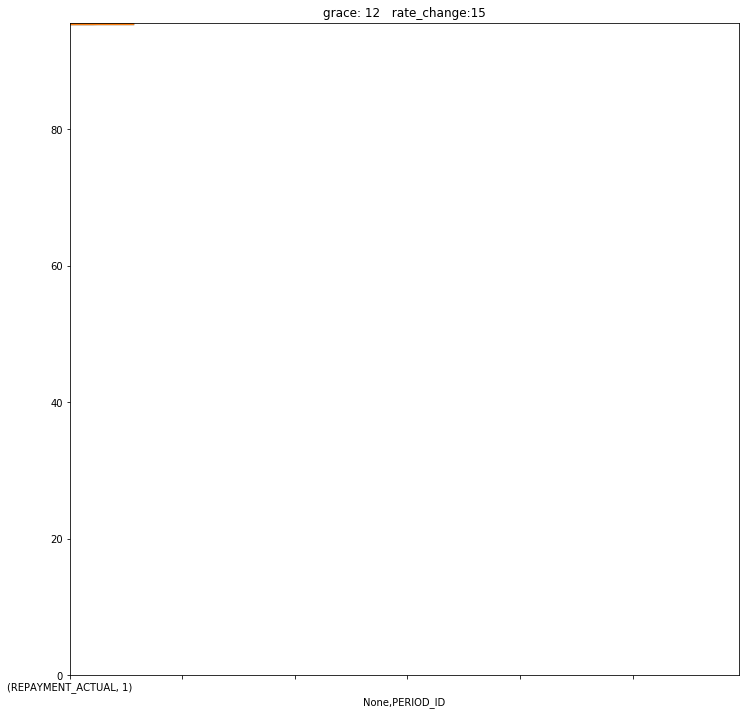

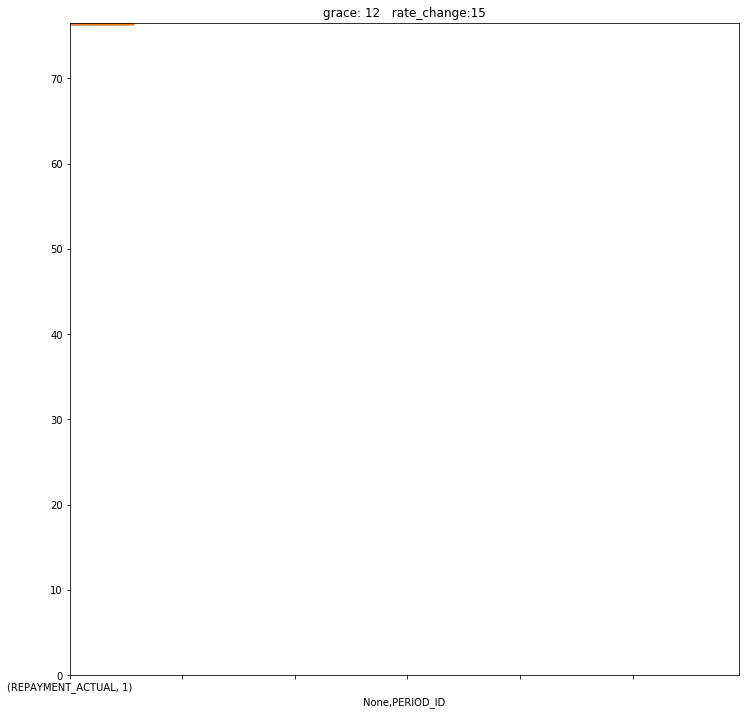

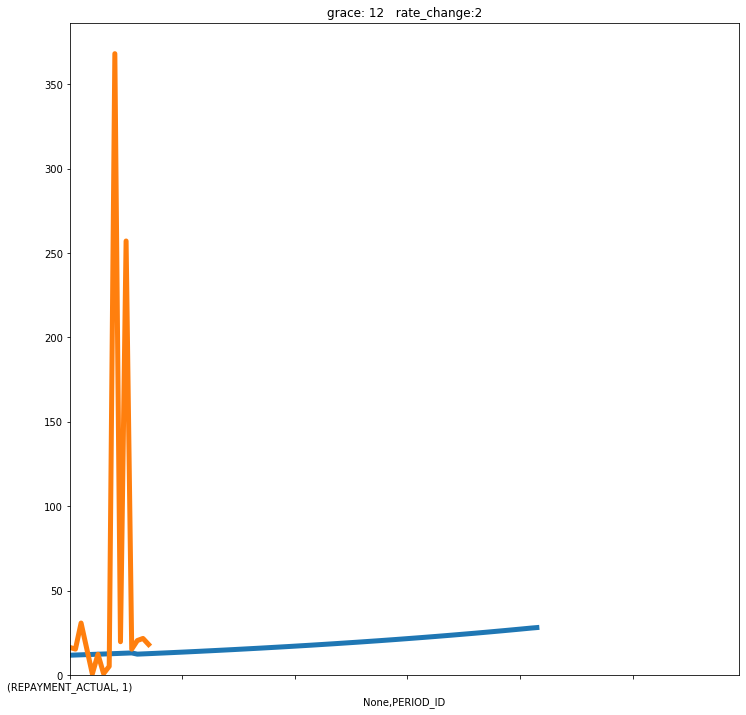

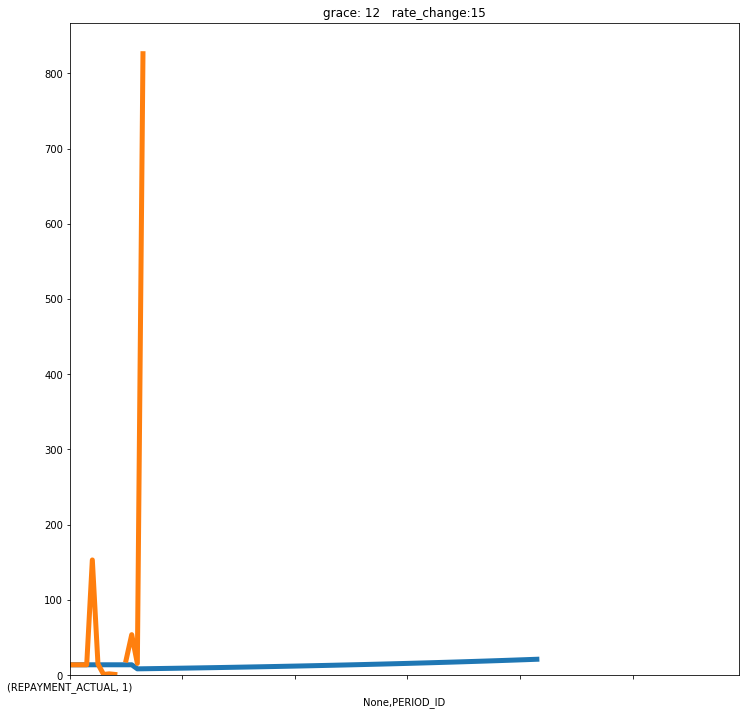

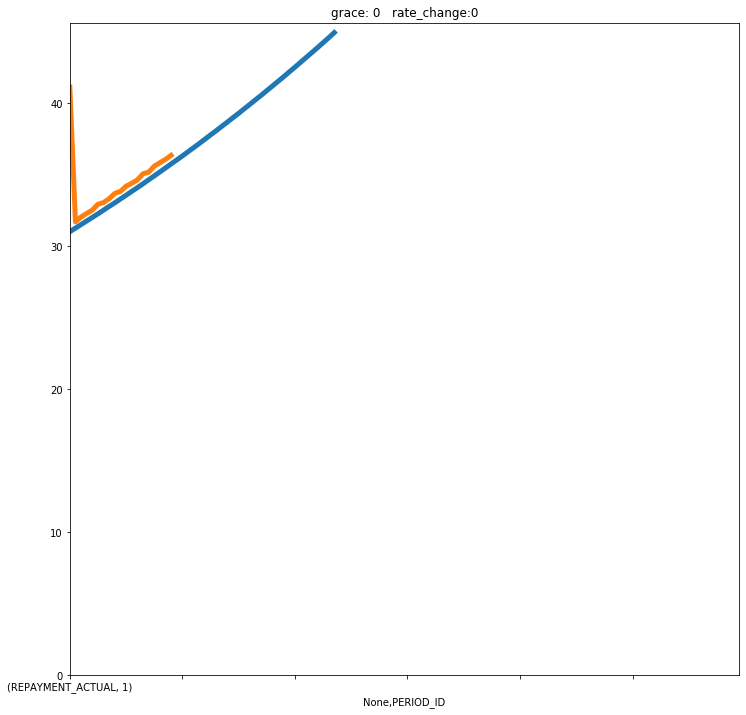

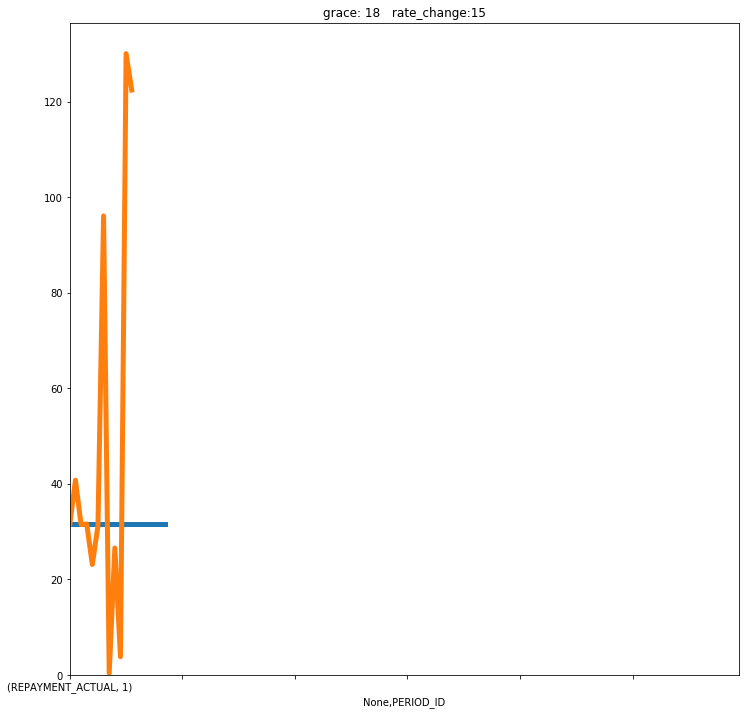

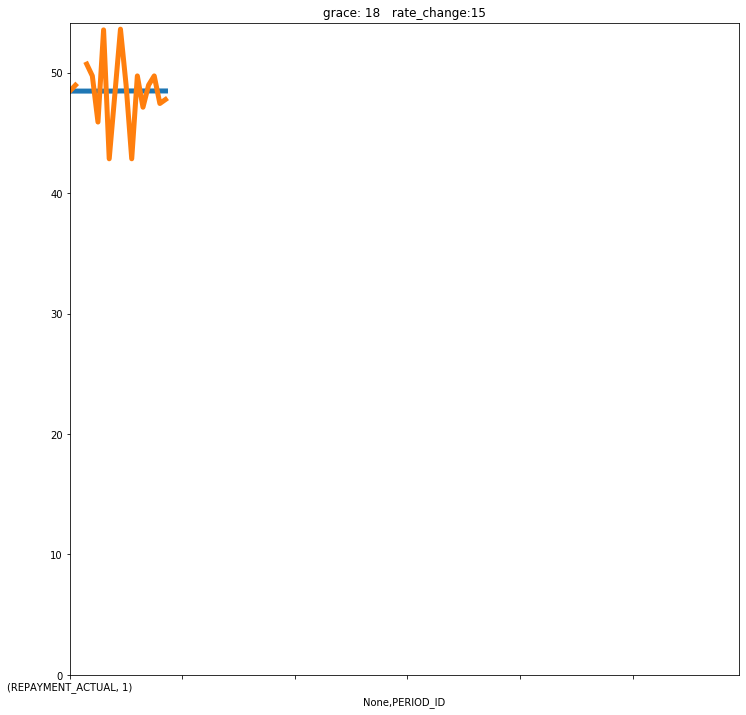

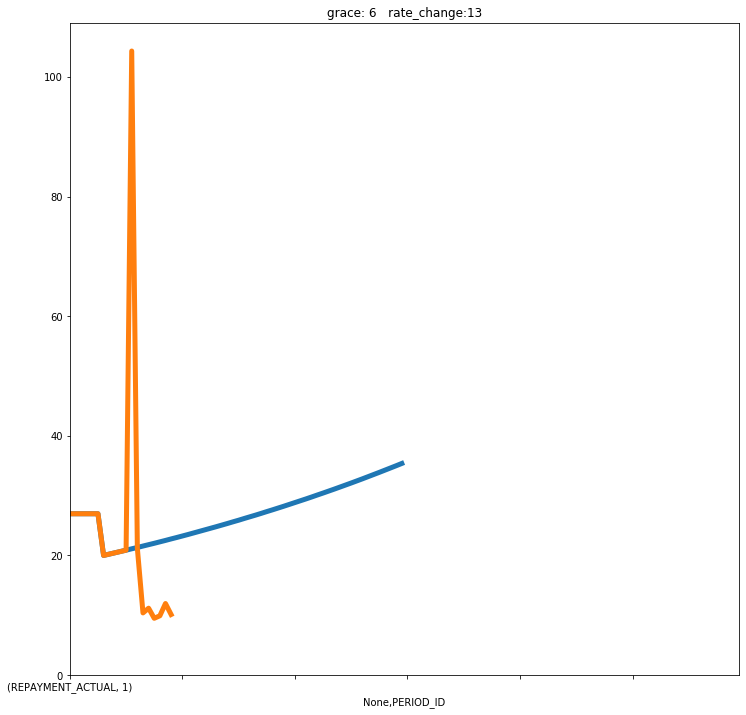

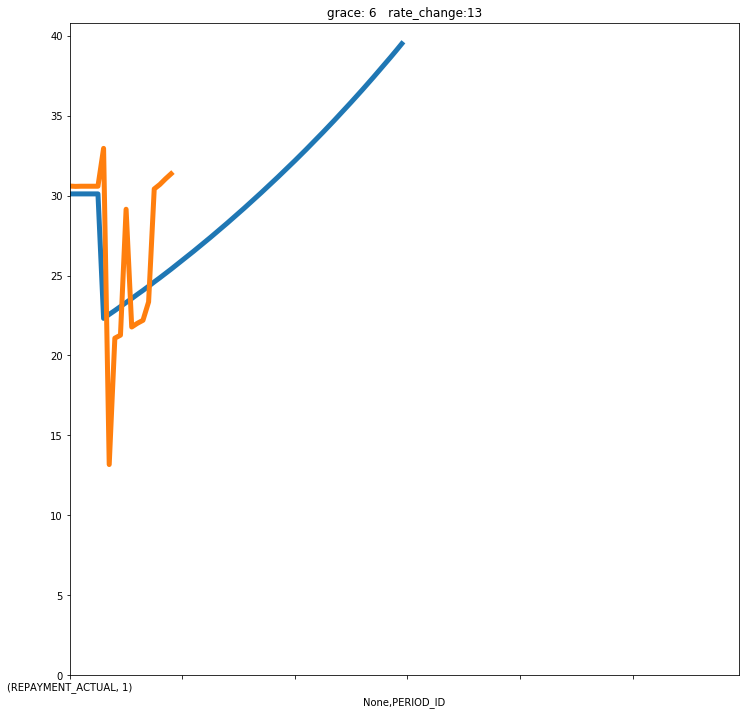

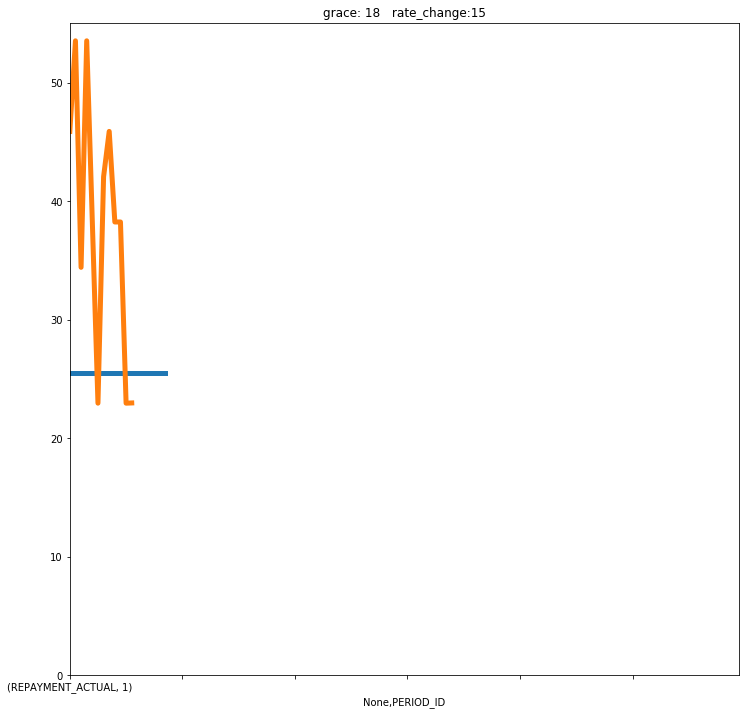

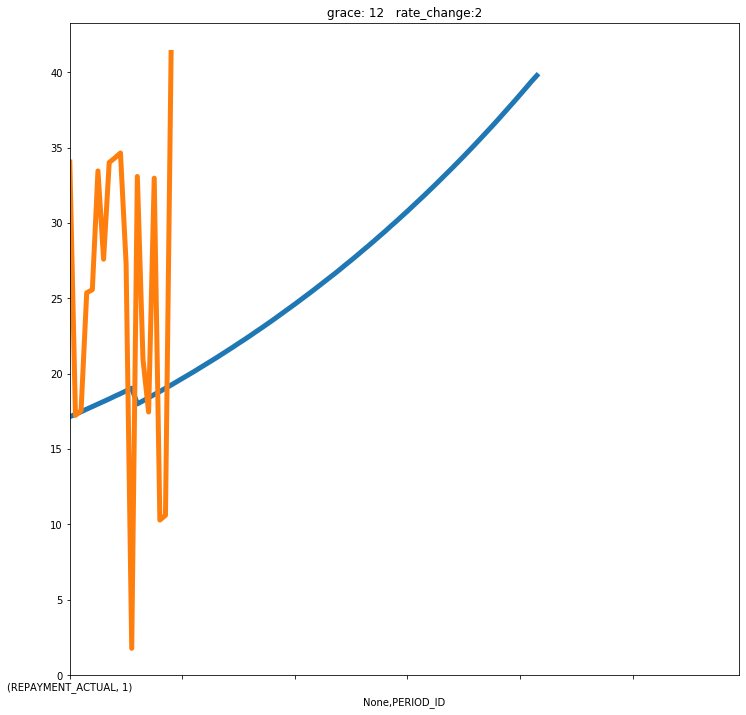

In [19]:
for i in range(50):
    plt.figure()
    pivot_scheduled.iloc[i].T.plot(figsize=(12, 12), linewidth = 5)
    pivot_actual.iloc[i].T.plot(figsize=(12, 12), linewidth = 5)
    plt.ylim(ymin=0)
    title = 'grace: ' + str(static[static['CONTRACT_ID'] == pivot_actual.iloc[i].name]['GRACE_PERIOD'].values[0]) + \
    '   rate_change:' + str(static[static['CONTRACT_ID'] == pivot_actual.iloc[i].name]['RATE_CHANGE_AFTER_GRACE'].values[0])

    plt.title(title)